In [1]:
import string
import re
from nltk.corpus import stopwords
from stemming.porter2 import stem
import networkx
import nltk
nltk.download('stopwords')

# RECOMMENDATIONS
#-----------------
import networkx
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib as mpl

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhavika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Read the data from the amazon-books.txt and populate amazonProducts nested dictionary
# key = ASIN; value = MetaData associated with ASIN
fhr = open('amazon-books.txt', 'r', encoding='utf-8', errors='ignore')
amazonBooks = {}
fhr.readline()
for line in fhr:
    cell = line.split('\t')
    MetaData = {}
    MetaData['Id'] = cell[0].strip()
    ASIN = cell[1].strip()
    MetaData['Title'] = cell[2].strip()
    MetaData['Categories'] = cell[3].strip()
    MetaData['Group'] = cell[4].strip()
    MetaData['Copurchased'] = cell[5].strip()
    MetaData['SalesRank'] = int(cell[6].strip())
    MetaData['TotalReviews'] = int(cell[7].strip())
    MetaData['AvgRating'] = float(cell[8].strip())
    MetaData['DegreeCentrality'] = int(cell[9].strip())
    MetaData['ClusteringCoeff'] = float(cell[10].strip())
    amazonBooks[ASIN] = MetaData
fhr.close()

In [3]:
# Read the data from amazon-books-copurchase.edgelist and assign it to copurchaseGraph weighted Graph;
# node = ASIN; edge = copurchase, edge weight = category similarity
fhr = open("amazon-books-copurchase.edgelist", "rb")
copurchaseGraphBooks = networkx.read_weighted_edgelist(fhr)
fhr.close()

In [14]:
for i in amazonBooks.keys():
    print(i)

0827229534
0738700797
0486287785
0842328327
1577943082
0486220125
0231118597
1859677800
0375709363
0871318237
1590770218
0313230269
1559362022
0195110382
0849311012
078510870X
3895780812
0393049388
0553525476
0939165252
1590930509
0231096704
1893732290
0781718791
0471150274
0895872218
0761116982
0439240751
0618111212
1898630038
0787950599
0312199406
1573221740
0130132543
0486268780
1861007418
0826449379
0590568833
0439420717
0687054532
0875420532
0944708498
0613100093
0486275035
1550416243
0398068917
087842461X
0393971694
1550373080
0026879077
0966723821
0689846088
0273651870
0393037622
1571515429
0810114275
0415925398
0415223954
157281196X
0375803394
0113300174
0786863919
1581150040
0312982178
0874850037
0811726371
1884997015
0140430407
059516630X
0912500476
0807205249
0415157528
039802278X
0671727737
1566913810
037575380X
0965740056
039572774X
0887402631
0310485002
042515517X
0071402306
0787958743
0743509315
1858685486
0151803870
0820451576
1555919332
0821825917
038548125X
0838531377

1552633020
0310246547
1580231020
0380731657
0595206875
9041118292
0674525531
1586440047
0471211516
1570425736
0195081056
0064437914
1889150193
1919792090
052116334X
0966993306
0634000470
0836236572
0340645474
0486411141
0791009580
0766806030
0788190202
1883013615
0917218566
0784711666
0895294966
0425187411
0811803635
0671017144
1901522687
0888804458
156010127X
0870134841
1563383179
0465031870
0155058118
0834216558
0486257045
0739828371
0394758536
1895811678
0439087430
0786705868
1550223879
0898707269
2060000823
087220037X
0679813462
0879191260
0964490234
0446600415
1583143343
0918399157
189252211X
156458481X
1573221589
0515093556
0970583109
0373244487
0582381738
0810919761
0072191759
1556618875
0471252670
093891118X
0060278420
0965608921
0792382560
1560061820
3540427171
1560254947
0345424581
0152168079
080329235X
0808528289
0385498675
0830817751
0670892920
0151007349
1887128883
1892389347
0201398133
1566379105
0761315799
0201770512
0415206790
0963413988
0880102837
0713486139
156731046X

0940669056
0399519114
0750626755
1884577024
053439177X
1860177271
0822004704
0121822648
0671894803
0521414296
074320106X
069620777X
0439164125
0465068006
0441555217
0856682152
0240803299
0806961120
0394748395
0553575937
0919813321
1585747122
0849953200
0879518995
087728816X
084230889X
0374371970
1855066696
0140421998
1895907101
0683306235
0375758402
1929446292
0486266338
393114156X
0125153929
0887272339
1566912954
0683026305
0805059431
0962299707
0393730549
1584280565
8488342012
067980904X
0393049639
1571530193
9004117024
0801867886
0894904760
0806974478
0760312087
0789453282
0062502727
1590300033
059010991X
1580540392
0062516957
0140247750
0452010349
0312252439
0609806971
0962471682
0743527844
1558748369
0970232705
0679773002
1579902677
0823013766
0877451133
1879335646
0195091108
0791427765
0521779170
158062460X
0873226097
0743480953
1557282935
0879757051
0130461342
0877799199
080283907X
9622176933
0671024590
0750690747
0689811918
1580623883
0500092923
0761919619
1565637356
1560533145

1873756704
156478181X
0792271084
0844240990
0595183379
067972947X
1878985175
1591160421
0262530791
0521629322
0883631075
1560433434
047208206X
0773496297
1890585009
0335207812
1899332545
0968232701
0070736715
0374343853
0768906385
0521525853
084993124X
9701507207
0691070695
0939837374
0830729267
0810934809
0811480585
0679800921
0310903041
156163252X
067440002X
0446610771
0520055640
1928599001
0689825544
188748907X
0310234840
0340760281
0198514891
0684804158
1842326732
0029024803
0300064985
0877287899
0531094979
0913167649
0515119385
0412041715
0486413322
0590867164
0631214836
1877740047
9004111468
0521804477
0743407865
0785266461
0316358355
0240803051
0521457238
0140567518
0814619940
1574670727
0887409156
0439062675
0787911712
1929838018
1581600674
0345437055
1555582338
0967963508
0933583079
0837731267
981024925X
0380718413
0674488822
0898621208
0321089790
0393730786
0758520719
0890899193
0671525751
1883522242
0152021639
0312971923
1890157058
0809226294
1557044864
0521658225
0811730859

0805006826
0750671947
1930665121
0486272737
1575050269
0942147057
0810940833
0671045229
0807553190
0679894098
0312267126
019854765X
0716751178
9630577046
1572300930
0900588675
1555534015
1564772519
0810919028
0923521534
1566633346
0262681188
0374186286
1552095703
1842225642
1573225304
1583880429
0226106748
0446610674
9004083324
0939666731
0691070458
0714839698
0323011942
0855984090
1559495588
0821772155
0553211765
0520077776
0310494109
0312302223
0785705252
0140176845
0674720954
9562110621
0802776388
0768841755
031023591X
0516211188
1573920363
0140444351
8424122917
0415049326
0895779129
0802818196
0062732862
1580540716
0870784129
0590442856
0471514764
0871138336
0670889415
0070056994
080755491X
0449004864
089526174X
0791444244
0765806576
0684850117
0813913667
0787951595
0412552701
0395442966
5103742292
0684819023
0802773400
1899332782
0865731624
0801868181
0152393390
0440210925
067155140X
0028622073
0515131660
0891894721
0425157776
0883965216
848992032X
0890966230
0672322684
086709429X

1930858027
0671043285
0806513667
0070248303
1580080413
1564144798
188516758X
0764554522
0062515837
0071360344
1559636408
1559273755
0140286829
0811200337
1586481274
0195108655
1886627037
0761305998
0060013826
0880488441
1878347004
0465004318
1890109398
0590067680
1567994350
0970610203
0312131526
0226190366
0833592092
0595191614
0486286118
0764913395
0670032212
1561582204
1562225812
007068054X
0802806740
1579620809
087530091X
052165842X
0963455788
0764516752
0970643500
087207191X
0820554545
0385302312
0764221477
0764549650
0810946866
0253208262
0769235824
1562939610
0789903849
0066237505
1573921858
0762414189
1401017304
1587171058
0412036215
0439040051
0070236941
1564597644
0781727960
0671582151
0801858615
0930113160
0873647181
0736411232
0786108673
068982422X
1552044602
0313297851
0965141829
0892877588
0884195988
B00000IRGQ
0815325061
0140504419
0816039402
1580000541
0590579649
0764924133
0521092272
1931836604
0345414063
020165895X
1568983530
0965897214
0865651566
0738200328
1551641429

0892749466
0226007588
0890242372
090038414X
0595002080
0399231013
1559948868
1558322329
0898798752
0634014978
0709069804
0804725292
091411901X
0875848311
0373806949
1883525012
9799532205
0452279496
019513818X
0689834888
0807124818
0231083548
0070097674
003050483X
0070108137
0781801656
187950538X
0595223613
0155073141
091354373X
0687009332
0136485022
1582442118
0966407571
0811202399
0737300256
0789306298
0872291081
0394800931
0907259081
0801869048
0687371295
0486273237
0789473941
073882755X
0156013363
1564145840
047138299X
0871401517
082175324X
1587610965
0689717261
0966262913
0816768668
1882835441
1556706960
0139361308
0130676101
3908163323
0393968200
0903585227
0803973233
1930082037
1568222335
1561893986
0787955558
0130215384
0609803867
1890168181
0613054237
0393048500
0800718194
0205148786
0801846471
0451205685
097131330X
0140190007
0312032749
0192803743
0385509529
1862047138
0816631441
0875967663
0202306607
1569311552
0880389095
0201750783
1566120365
0791428907
0618050515
0590847945

0899973035
0313320500
1584882956
0896585301
0201525771
1886463182
1892005026
0811809935
0446674109
1880677059
2253147729
1881955664
0801484057
0324019874
0471228850
0886779790
0813921775
1570717397
0195122364
0895263335
067406805X
0844240818
1587887509
9627762822
0953747972
1580630359
0292707711
0670884510
0307055116
0811202151
0764566407
0822516071
0911647384
0321108957
0934252637
1931382026
1566397618
0316610895
0884117006
0262072106
0967836301
0310431913
0899574750
0345441508
1572303581
0679463046
0965060608
0807821187
0300076185
158279121X
0742518868
156592942X
0881504963
1880226960
0521794013
0333593030
083081535X
9966985603
1903070015
0525461876
069104824X
0936077344
188382334X
0199244286
0609608444
0914101021
0312867972
0380804891
0140440461
3930698102
9051839790
0201342774
0761110569
0801863538
041519749X
0674689593
1572241314
0866518231
097210335X
0896598675
0738205443
0787910651
0310925932
0802838871
0156899825
094302613X
0793563763
082760713X
0827379900
2909838447
0521793793

0890878382
0385335709
0226470571
0195214455
1565071018
0195064712
0882681338
031226982X
849236498X
091221211X
089281859X
002865482X
0812504488
0811215008
0393048187
0879517123
0395837367
0684845946
0932081215
0471330612
0736911065
0060953039
158089075X
0553274112
1581128789
1931081166
0883658615
0933919220
0953526739
1559361689
1570721424
0413743802
1842124072
0312922132
0684846411
097084090X
1558680454
0451456718
0884046818
0615118356
1583225463
0793530911
031423148X
0572019459
0757300111
0736904948
1564592308
0809230798
0898797160
1563824760
1587153572
0793500214
0375411224
067973712X
0842359702
1583670580
1580110606
0800631641
0782128742
1879260255
074343479X
0345413997
1868725022
0439139317
0393309320
0027352358
0702025399
0446401870
1572241357
0521663849
087891059X
0813525004
0870491822
0408013672
0619075287
0913408077
039308700X
0961891688
0762409444
0060175508
0072126965
034073583X
0802135285
0521005124
0963145258
0192632809
068981013X
962361621X
0940322277
1883011582
0691088543

0671023373
0765600765
0746041454
0962765902
0345421922
0970008422
1878450204
8483063034
1890236225
0521497698
1564594599
0842334068
0918334918
1841260843
0807059188
0807553913
0766832066
0439201535
0030178991
0324164920
0609609181
0130165557
0674007247
1555878520
1563893592
050001664X
0140420150
0312076223
0444504230
1587155958
1560252472
0789410516
1581127049
0060192461
0192892894
0743202015
0670894257
0785257292
0967922704
0130615897
1571670483
1903471273
1892161311
0252025571
0849942446
0451410297
0316607150
1564146413
067232105X
1581128541
0810935201
0874516161
0698118553
0873514556
0932379559
0600602192
1857544862
0789426579
1890154458
0791408205
0071375228
0452282683
0761314377
0486264688
1591296331
1576736504
0786805579
1841762105
0672324563
1574101129
0889224269
0721684475
0698117859
0923521267
0671026429
0828320292
0803270410
0844238945
0312439687
0321091019
0811815935
0671797840
0896033317
0882102435
1587218526
052159989X
1570624763
0312155603
0694012211
0761911561
0963257307

0735612528
0683301454
0812555325
1856499391
0595227503
0395974836
0618340874
1561581607
0380751380
0590026119
0205327435
0300074239
014026373X
1586481924
0486240517
0892838973
0425121631
1884737803
015202509X
0786866233
080393324X
096735370X
0486696480
0895267616
0764171003
0802151140
1564144267
0764553747
0679720200
1563975556
0802806015
0345439104
0130172774
081461311X
0671581953
0393308650
189764857X
0312878842
0923155031
0130893986
0807740640
0380791250
068722120X
0967096723
1563089904
0671737783
0679866558
0446676837
0754808203
1555031463
0205319599
158005059X
082645237X
9799589878
0786004630
0934893357
0671540858
1560524391
0521424208
1588101959
0873494822
0419235302
0964639173
0130957836
0870675885
1581344503
0195106504
0375822070
0823629104
0312961316
0553293362
1564145107
0299161102
0664252311
0763606731
096283050X
0520057317
0609606212
1889330434
0740717561
0768839149
0688143709
0921463340
0817013997
0439305209
082232623X
0789434369
019851896X
0964366703
0764300172
0345433971

080075445X
0195107624
091721840X
038075620X
1855857588
0865474338
1893114015
0395755344
0393969665
002864414X
0743444159
0415010454
1556614551
0306434512
0449210502
1587990911
0471304972
0310221099
0815128355
0072435887
0948390832
1580171702
0870233122
1576102289
0711977704
0758202091
0848719484
0394532643
1560447451
0613166221
0060194626
1884778968
0316332976
1581132530
1874267103
0140296301
0520226410
1565047532
026268134X
1892327988
0521288967
0689833210
1586631152
0801439949
1585831441
1574391178
0967418402
0804820821
1861000871
1842222643
0534536166
0829416439
1883751039
1930874006
0967811600
1578200326
081673769X
1558606556
0689830548
0140293876
0826213561
058245249X
0802846688
1560533668
0060006668
0632043954
1574091085
0609607596
0915811529
0807124168
0806350962
0525465316
0879462388
0802114288
0374349924
0374123543
0691044333
1566492521
015610850X
1579901646
1565633652
0471390658
1566869455
0395720990
0619033827
1882583140
9067180904
1564410048
0781720443
1557985782
0964305119

0312119038
1556523424
085953605X
076681923X
0312282567
0471397903
0618002235
0446343455
082182130X
1403328269
0737702303
0698115813
0761535705
0959774661
078173164X
0517880806
012449983X
0849913071
0804743533
0471983926
0872263150
0970576900
0590448382
0898706602
0262112515
3540657908
1581150547
0826310915
1569310920
0930073185
1581500580
0316090581
0618029230
0750021276
0863776973
0932704468
1567998968
0316561479
0072436573
1563272601
0486403084
1880464039
0471298298
080329199X
0449150178
0964511177
0822310236
074352084X
0387905367
1580082572
0688139795
0262194481
0195123158
1861001401
0352336633
8270540439
0803937458
0879755946
0825472059
0201354411
0945353898
1564966984
0671041746
1557044554
1879876353
1566912695
188436201X
9688901105
0962741736
184176146X
0452279151
1885478755
086547639X
0671519824
0618219226
1566563011
0393316823
0766107558
0970262655
0873983688
0198159498
0471247367
1550022652
1574884662
0374110115
1563897318
1559717920
0875968619
0486243028
1579651909
0805070583

0814651542
0595260349
0520075765
0836249151
0892818379
0967993512
039300743X
0970357400
1883219337
0830728880
0743215559
0847727807
0415908647
0934426015
1885477449
078901176X
0312878222
0307112519
0198295863
1861081596
1564146634
0471253847
0393092097
0740716298
0062503545
1583371362
0829414525
0521424461
029597088X
0195036425
0380802317
0962713813
0964318903
0202306321
0333585321
0822957310
0385318626
1559638710
1842225952
0929950216
0878797920
0721661424
9812324275
1582380392
0969801645
007043316X
1853753998
0517183617
1886705437
1565480384
0965261603
0763603783
0809129728
0521000289
0582437547
0201310139
1585319996
0375727752
0071369945
0310220157
0201145197
0028643208
0140294600
0325004897
0940322099
1582292221
0595230016
1931056536
0807083429
0345433319
1572304855
0970321937
0679429085
0879910518
0824792378
0789478331
0226134261
0883682060
0312305079
1558536167
0395957737
0801038596
0750639725
1572702044
0804726876
1564110036
0820324094
0803114850
0865303681
8484531163
0946487316

1891100629
0945941110
0764118226
1584651695
0312166818
0064470946
0590502131
0415076382
0893300470
155786909X
0825420938
0876283865
007243418X
1893361128
0252067010
0140196110
0967328926
1562199137
0884974448
0873376137
0761904425
0674005511
0736808957
0138579962
1567653057
0803281757
0874806984
1931122105
0471410896
0960255206
0899422713
0899190391
0683302043
9997141628
1843335972
0788197207
1891112589
0793502918
0792373049
0970319908
9633524164
0292724950
0804231419
0262582139
1850752842
0520231759
078800817X
1931682054
0439355451
0769235891
0072537272
1893860264
0961789808
1590959000
9507312722
1587620693
1580863817
0806522194
0785915540
0882143794
1852852690
079237679X
4529034038
0439358043
0787298328
0891873716
0932085547
0916390624
8170592348
0721630979
0516262475
0130601470
3527301275
0789466864
0195034864
0824717287
1878481320
0964371111
1570753431
188634650X
0788417754
0399524819
0310540216
0887409741
1864501480
0435072536
0198710372
0892724579
1579107672
0312963165
0534600190

0312858868
1560533137
1878741500
0894649337
B00005QFJ0
0873351789
0486411397
1883846560
1569313687
0963816837
0201758458
1903276195
0130455296
0803965230
1559495928
0806638974
0824706625
1879356090
7148601959
1590510305
1580620159
0963634291
1557093865
1565630890
0312264291
1858986877
020532715X
0517203022
1559390093
0963971808
0026458101
0253328918
0312301235
0815514387
0898712750
1882331230
0836250893
0787998567
1861003625
0199241309
0737302046
0743527062
0448426765
1557998531
0596000138
1562436368
0781732654
0520236416
0698113772
1555703712
9998136423
0870239651
0843149388
019513740X
0072548193
0789441535
0801484243
0393041638
0812570421
0826408516
1561840033
1575871726
0071343547
007030825X
0910554447
0471358681
0262692791
0205319114
0486200256
0609804138
0892261048
0813025613
031332073X
0881430765
1882383125
0345441710
0486295257
0810839628
0674794885
0919381065
0292738692
0802442307
0767416430
0878915915
0310492904
188328015X
0964885948
1879907925
0375904778
0815628587
156496664X

0807506257
0935989897
1568982410
0842339175
0810965976
0398070830
0944040527
1898683255
0521522986
0486999610
0700702334
0801057507
0465044506
0890159866
0632043687
0800786335
1558672575
0875084559
0793545765
0807853542
0793525071
0910034311
093960311X
0921870620
0764314726
0873393201
0822364816
0195103920
0961320516
1572731079
012351830X
0613235053
0415946425
1880410796
0792382048
0939838494
1580110819
0199257744
0940931931
388375563X
0911029443
0735610177
0836247140
0942257367
0945383347
0521599954
0486675394
082031899X
0446600342
185302757X
0345420667
0761955925
0966502124
0415120810
0967584248
0815775733
1858988713
1550680927
0813326745
0553281097
0130141445
0728602318
0520076702
0694525782
0714619434
0962050261
087034059X
0393025500
0814714420
0071351604
059514814X
0873988299
1576901823
0486294552
0471434639
0971115508
0761410236
0425187551
0865427291
0722533691
1585741264
0766825353
0312083025
0802741436
0850453593
0967613647
0830814930
0814613632
0262040611
0763136875
0871272113

014016622X
1565927486
0399528156
0120848139
0736412093
0912451041
1569316945
1887537171
0715632086
0521635683
0966823915
0713643439
0140102310
0688154379
0969995709
0205164579
1580800122
0070681589
0313320608
019850103X
0823415198
060980197X
3438060108
0713470461
076660134X
0848726200
0964085836
0393041522
0802775586
0316142697
0805029648
1841660574
0941419924
0962618489
0747549222
0810977567
0345444388
0065010329
0226857476
1568811179
0520034759
0316816795
0806520701
1885477767
0140434461
0764566504
1580630235
0385502109
0465006450
0133470970
0788708155
0312199023
1566397537
0609804227
0813025729
014042346X
1857924975
0934140618
1582791139
0830815236
157673398X
041509920X
076455378X
0451207726
0595197957
0192838997
1564590429
0684842963
0931948002
0842343296
1587980169
0061092207
1585744840
0963761234
0816021236
039332298X
015200050X
0671026151
0439425263
0312289480
0743222768
1575871165
0803963602
1556645155
0393317307
0898152224
1898660719
082341373X
0201704463
0061097357
0226195589

0785111093
1555404278
1570629005
0802132758
092270595X
0890966044
1567222021
0658010093
0876686935
0800756622
0312295111
0340756616
0072132590
0486255484
0964397064
0306806495
1562475312
0781716322
020529006X
1885586019
0816630607
0786862661
0071346961
0892873310
1569312931
1579122671
0609601601
0801984939
0324113641
0529110040
0471361917
1873968442
0613342062
0394718429
0879302895
0761531815
0201794799
0941270904
9275315728
0205279880
1571742921
046508172X
1576832384
1557866090
0863161995
0195851153
0618051589
0679889507
1859679056
0375505717
1886185131
0691011923
1890774030
0823216705
0823016919
0787942928
1842151304
0520204190
9626340622
0791439305
0787956317
0929261097
1578702410
0521656249
0943629403
0375430881
1568981805
044667933X
0673156427
0201709384
188668104X
0471441244
185532590X
0743217152
035233777X
1585000914
081956205X
1569945047
1579101356
1899870458
0803754523
1578860032
0787953849
0912212829
0906717590
0156001934
0439271657
1858283817
1931561281
0452261120
0789305216

1558744649
1579900194
9681908988
0521629284
0380723840
1560253304
0064473546
3540438742
1563978288
047139842X
0880015470
1569903069
1903399068
0865474540
0198296258
074250039X
0943126878
0631199810
007243371X
0789008203
0814727239
0130429058
0970938802
0971082022
0201700638
1559638982
0738828912
1930607199
0486414507
0252069439
0071347259
1562929283
081254725X
0945999844
1575421224
0075542234
0786816767
080102238X
0521000831
0679755535
0295976225
0877240167
1878367331
155581199X
0940602946
1841580929
051513158X
8424131835
140003051X
1558610367
0004707508
0867094192
1566901537
0534527272
1560447125
0760309140
1574670484
0310700159
0917583094
0863040691
0825602882
9625933298
1570428565
0316085197
0679728260
052164609X
082941469X
0966863909
0844279854
0809310139
0595194729
1561841609
0471155144
0870702823
0387987606
0534562957
0934623023
0399217975
1569317801
1550413856
0810119080
158574249X
0687091748
0884197603
0939656213
0811835847
0789447835
1404312951
0849937043
0486229289
0375811397

0812579089
0822956608
0226238032
0397515685
0679722661
0590054872
0721677444
0226305767
189365267X
1851820728
1570612420
0787955892
0553269674
0761529969
0850459966
1857881338
0803261918
1891853112
0486410102
0380815265
0847698955
0793516617
1580080715
0883853140
0966435435
1559391421
0673980707
0912843179
0789471876
0800792645
0803606028
1563084465
0940462893
0766105628
1859840388
0195117972
3456814402
076360013X
0312277024
0304352322
1569316554
0333782860
0764153161
0804718849
0374527148
1563991624
0805070931
0451205162
0471281085
0415179882
1862047308
0375701389
0872205541
0618212930
0345413490
1572321938
0891349340
0834114771
0253208106
0925279773
0964190540
1560551895
1564144097
0938020501
0393972178
0449007464
0130329991
0374283923
0156086824
0738510092
158488133X
1592290086
1559273615
0226850862
1931232253
1853023892
0590436287
0312216491
097043300X
0613018818
0842332529
0486253848
1569717087
9505113862
0738508527
189350204X
0198257139
0130124818
1840004436
1565938089
158261492X

0415207347
0967945631
0764502824
0553756877
1588720772
0375413898
158663240X
0324131666
1853673803
0465021522
0791451437
0671793888
0761528288
0831400633
0873377907
0806997672
0393972771
1580170854
1577910044
0395815916
0061098272
0679732438
3861871920
0844229415
080284135X
0205295363
1579902391
0534372619
0252008073
9630040689
0940672480
0595181074
0789207192
0380807009
0814713181
0571210171
0380718332
0813808936
0827606567
0460877895
0766809595
0452282438
0671024078
0892724889
0395586992
0275945766
0810913267
0140248307
0130409596
087868607X
187824406X
1588464091
0964957701
0967613868
1558747346
0764225359
0073039861
0064442705
1571685723
0155674250
1578566398
0963879308
0471297143
0808537598
0674003071
0521008433
0387948937
0471316717
1586635182
0967605164
1565111451
0679832270
157223394X
0789300192
0312973047
038757204X
0960695451
0873718941
1583480463
0125450753
0198781016
1560438495
0967398371
0631206523
0942084241
0834804867
0595232884
0325002630
0679866973
0425098478
0670888656

0684837056
0786853077
0443062870
1573060208
999373926X
0553576399
1881955273
0679428178
0312204280
1558534504
0744000653
0897333098
0393030326
1574862154
0687179246
053438742X
0763137138
0679757716
1573800074
0486289508
0226001032
096632580X
1930596170
0918720583
0613033264
0631180281
0789473712
087654104X
0887059724
0759658994
0688004776
1841260878
0684824353
052149768X
0590416243
0786887621
157748715X
0965958302
0520217551
0789716356
0673363724
0789206218
1559634960
0932633412
0805836470
0140440070
1932033041
0060192410
1560252405
048626467X
1561840572
0764151649
0967742013
0813122457
9992426802
0312082584
0375421254
0785257284
0132199084
3540760407
0060509325
1555877850
158112855X
1558184384
0792341740
0756713226
9505530293
0674995708
1574862006
0810935236
1578061857
0140153004
0060183942
0829718486
0824508912
0698118545
1888001623
0786812079
0375726217
0873895096
0195097467
9875260207
0374480125
0451200101
0071387072
0968677312
0517162059
0886777887
1571459022
0674843711
0804831297

0965730204
1570595593
0874871697
1581150962
037312175X
1879418614
0375705074
0375811524
039490091X
8120817168
1557091153
0323011349
1903980186
0307106535
044661095X
0140233237
0939154285
0816763208
0753453088
0963832786
0226771873
0395984912
0252068890
0140714669
1580632084
0801834090
9685100063
0664240267
0199252637
0451410815
0803931301
158715028X
0596003382
0801866510
0619120681
0891416773
0761512128
0743222067
0333718305
0295975903
0750921684
0804738947
0788162977
186108062X
0688161618
1578562775
0785702903
1565077202
051810169X
0440411289
0844216305
0140146563
0971533814
0802134750
157324502X
0691007357
0451518829
0471380741
0195130855
0634009877
0521456932
0425099997
0842318267
0806121246
082302184X
1557345597
1561451479
1891929607
1403307210
0763620653
0312929870
1575933225
0932958079
0440467314
0824795628
0312238940
1565044894
0761906150
0881924830
0753454734
0679890351
0967226317
0970879024
0960630015
0823414590
0757991963
0809296985
0465089860
0896724794
0773521682
0300077688

0471283797
0765702401
0875082734
0312200811
156389680X
1585743283
4925080482
1550170414
0891456538
0802135439
0759643377
080199134X
0815411359
0786217537
0345433769
043912042X
1558190643
0312240384
0873378075
0865437130
2080136879
0380789892
0891344187
0130914495
0821221957
0767908864
052142223X
0375802320
0500203350
0006482864
0874207711
0201882604
066424162X
096610725X
0373638329
0865771537
0809236974
0743233824
0413748707
0971772967
0786407840
0670526045
0892814179
0195112245
1581602715
0823028712
0792273516
0674217039
1841120685
1579541879
0814207901
1583140514
0312208626
0972028005
0743206096
0834120011
1891024353
031022652X
1573927457
1880849380
0971763801
0300066384
0789404664
0942612140
0874869161
0373259476
0201112973
1842122126
1555835384
1558321799
053483521X
1560272171
0787939021
0634004956
0471558710
0595088996
1880941422
0679742220
0898703573
0764922149
3805572646
1556523246
0875085857
1861524080
1568380836
0965502953
0324158653
0806636106
0072369442
0785814574
0736904549

025321517X
0553351370
089281764X
1884369359
000472206X
1585747211
1585672505
1582460094
0963334603
0877203687
0679765611
0486417379
086554607X
0060246626
0441812627
0345444086
0762101938
0132874423
0916834131
0721688969
0786311193
0553572733
1859608337
0882433199
0762100494
0380804727
1562012371
1556524730
0310219302
0691074372
0130198595
1560975342
0130848751
0871318369
0829705155
0802860788
0399233563
044922290X
0471289396
1881955818
0595008208
0870611410
0521655420
0486248224
1570717540
9623610092
1557986797
0195050665
055337494X
0738523267
0192852949
1892951029
0700608281
0226043835
9992267429
155921290X
8424181158
0141802847
0669457701
0553213466
0618111301
0060296410
1579542972
0741405571
0743436148
041516799X
0864426615
0822005972
0385495242
0664221505
012524990X
0142300993
0791425819
0130055964
0486680444
0553802526
0941599523
0691022348
0520224027
0738700681
0873890833
8474320127
0596004001
0736904514
0759688559
0393037118
1579545475
1550091204
8481643475
0451457811
0768902940

0060922850
0931866154
0750697865
0553493833
0767904877
0590460544
0312981341
0764152734
1891620282
081677238X
0679413308
1569315329
1577489780
0689847033
0324070993
0743229002
067103491X
0567085422
0817634908
0810945649
083847909X
1569310661
0803985630
0849308259
0192629395
1566890020
0964324458
1878267299
0874779405
0674004558
0140503935
0425167313
0306807866
0705436136
0849300827
0671537660
1880155044
0875652328
0130986178
0632036397
0813209323
0804729557
0761964142
0966693205
0934211531
0521220181
0815700792
0609603752
0130903078
0781720389
0944634567
1895900301
0262692392
0895555344
0405061226
0767427718
0838402348
0471157651
1565845137
0415228794
0793835771
0766813096
0486278662
0763143367
0449147606
0127448527
0804820163
1901130312
0307340937
1884612016
0879056584
1555833187
0205265111
0847819051
1904151159
0582291437
007034454X
1581343191
0517584123
1569761132
0395978297
1928950914
1558685308
0553373684
0340805064
1871592887
0808008250
158081137X
157054560X
0345410084
1555703429

1576739430
0399134204
0785212434
0893754986
0525467408
037576254X
0940781093
8401474655
059044669X
1883620015
1850281548
0753504022
0553493264
0873649214
156015912X
0792386671
0312200773
0844201561
0762406917
071485056X
0425188833
0380974231
0862787114
0375756639
0816040516
0829412700
0738203890
156625003X
1402073380
1886768390
0471608122
0735506167
1932094199
0886463777
1568222777
053130325X
084313920X
1899765891
0323018076
156955126X
0595136079
0968144829
0743476239
0781806046
0679641025
030680963X
186254462X
1860941818
0553477439
188765609X
075960164X
0970346018
0749519975
0205337465
1591130689
0195129652
053457596X
0850459214
080215106X
0877933189
0452273870
0689851073
1401900186
0855327324
0791044920
1881527972
0689809018
0070504512
0674817362
0415121981
0965627608
0446673439
048641891X
0940666588
092313557X
1930409036
0517589656
0335199623
0844281298
0806409215
0333436741
0767907590
1842153072
0750648325
0814250432
0380791390
0066210712
0140867740
0345445937
1900924226
1928743005

0226204030
0825439671
1568217900
1550546007
0195046714
0761520147
041592829X
0722535538
0140589260
1880582562
0965729893
1562614045
0810926385
0898711894
155622513X
1893554600
0670032018
0471977632
0472111353
0380773406
0866538593
0471216453
0262611538
1884834337
1569246645
1558506462
156459744X
9766400660
0801993431
0307201341
0889652104
097057682X
0967344204
1879181894
0689715129
1587620669
0806519819
0824941330
0517880962
0736411070
0691001405
0970569505
0688077587
0595148263
0821772694
1564554236
0847693325
0071372660
0964084813
0061066494
1560972645
0801483115
0446677043
0971217203
1565115511
0460876252
1565924193
0412721902
0684856905
039305019X
0198173873
1563963779
1562939017
071195223X
0516262467
0967094119
189278405X
0811826465
0679721886
0762102373
1551802791
1864501499
0787910880
0415933234
0684801132
0789466813
0802068537
0961906677
0671036025
0439317355
1564660915
0766106462
0844265977
0736903178
0395253772
0231115296
0439230233
1886346518
1577311922
1566912199
019513186X

1894622103
0768420431
0805071784
1557487308
0970790902
0965145824
0763604070
0892872438
0811896730
094387324X
0825613191
0736037012
0066212448
0140385517
0880117362
1879181606
0521669731
0691043914
0385326149
0091017602
1862075298
0385327234
0886878624
1410400700
1579904297
0451410777
0887764150
0735816018
0689849931
0309036070
0375405089
0684835231
1559496843
0415155320
067690209X
0740718371
0609609254
0764508954
1931173044
1575420244
1879505185
1931179077
1881163156
025328029X
1570033382
0939314339
0071348492
0801080371
0830810692
0802775640
0440500702
0553581015
0676901743
0874475384
0380769344
032116847X
1567184464
1862041237
0590697692
0240516567
0760308322
0130273643
0425174468
0415067006
1887565027
0736617000
0195651103
9280809466
1566914191
0130461393
0198238363
0812034090
0764171941
0520215249
0683180347
0970108842
019501569X
0140192522
0801303125
0393306976
0060928182
076530032X
0399231617
0070084998
0679007482
0962117714
0938289446
0740717227
0609606972
0967402301
0393703258

0062516973
1588991245
0944533272
0312262825
0742500438
1840680474
0609806955
0804832870
0553580590
0195116186
1579902693
0789426013
0766107752
1562615300
0807742996
0137495323
076210340X
0891094202
0028621743
0312866593
1557882789
067400194X
1563924692
0879757078
1563470241
0486270173
0922658013
1931841020
0806132892
1565637372
8716134958
0807553689
0821227696
0918804310
1579540449
0064471837
0140173188
0613148657
0820321567
0787947865
0823218074
0316113166
0805057897
3921338026
089236551X
156030183X
0749431423
0471442224
983915415X
0895299038
0967952069
0872598543
0590373544
1556432801
157230507X
0963957317
1932091025
0822211262
0399220372
0471205117
0684856352
0070432589
1586211889
1555877516
0195151704
1567400655
0201758423
0072316381
039923019X
0596500092
0619058080
0671796240
0843178078
0802439241
0816774676
0711925860
0965755614
0521637120
0312150628
0752837885
9178662478
1585980331
0826412327
1573441635
0898751462
0965803503
0385327781
156718684X
1581822405
0815716966
188517151X

0789904853
014051452X
0812534832
078031168X
0140020039
1580621449
0743520300
044024126X
097128170X
0875843433
0810934868
0446610496
0679800905
0195106814
1879434482
0830729240
078212321X
0451167317
0312971907
1587620030
0395535921
0321115481
074840645X
0312859783
1876907428
0816030820
0764281577
0811821102
0782140823
0814478883
1561632503
0062502182
0805461450
0805002138
1585182095
0895948958
0965775569
1854104861
0316358371
0395691206
0064432092
0789449447
0240803035
0814619967
0751518115
0020218079
1558745076
0750921471
0316955108
1884235255
0716737418
8441408300
0312217862
1879523027
0064406830
1564965732
0761512330
0688158285
1562861158
088404503X
0385327080
0521893860
0199252009
0312305966
0898868335
1584690119
1557290695
076270358X
1562920839
1579102379
0312209452
0809131498
0948549904
0750623411
0471138983
0805062440
0812510488
0743517679
1402536321
0785265953
1587155001
0753810875
0679640908
0071358714
0763612693
0801859611
037581101X
0789461153
0071363424
094648774X
1840460717

0770425909
0803723539
0132997363
0674007573
0486234312
1879603098
0689817363
1582343349
0671578243
0634041428
0345386663
1887752382
0345332881
0385320108
2061000894
0380781484
0670894567
1564773167
0679005854
0805043993
0781720664
0764546937
0802841805
1575843102
3822818550
0500276641
0683303961
0830823204
0815166214
0824941918
1573222003
1850008140
0809140667
0847819132
1902852044
081254921X
0801497582
0810918234
1842323830
1560150386
0387988319
0691029091
0064452034
1840590556
0763605395
1580081746
1890490156
1882982355
0891349286
0140563660
1564771288
0800627881
0071387730
1852239972
0521422701
0520234626
0738843873
0932419062
1578600804
0892813946
0932482201
0912646977
0896083853
1890817465
1568581858
0765607190
0893342602
0070331286
0312875843
0471297836
157131251X
0966343204
043944246X
0373037279
0387953434
0440400104
0674874803
0595090532
0471349674
1581500084
0205268110
0310900956
8408019414
0963321315
1558586393
0671729403
0781432421
0310225736
0750671920
0736909176
0486202909

1841764450
0395955289
0883659883
0205263666
0505522675
0813520886
0935015396
0312979509
0968485006
0753451948
0590881957
0486410870
1931543119
1572331445
0689846649
0953709701
0689852223
0671039830
0099429527
0395920841
1591820804
0525464212
3540429131
1556780524
0471148024
1565632834
0789457288
0898861853
0195153340
1891846213
0117024600
078900769X
0684854791
0875963684
0898705614
087905798X
0310493803
0446609536
0300083823
0851708099
0965944409
0521814596
1880785250
2880467233
0333637933
0711968136
1577196058
089283773X
0137669577
0534527361
0787956511
084782442X
0965377458
0919123201
0521665787
0764532634
0312268076
0226110575
079450194X
0451457560
067101532X
0785811141
0811726576
1560430311
1582341362
1574882597
0440213029
0395956161
0151009732
0894134418
1564556964
0201433206
0823024520
0938665936
0875805795
0130420557
0864426976
0873492870
0312876947
1580800483
0910261393
1561834785
1566629551
1570625794
0850363802
0865544425
8423309835
0881332941
0609607243
0671041800
0813014514

0471242470
0807846481
0867308427
0920501605
0825437938
088011732X
0789484250
0471382671
0836190947
067102762X
0893818941
1569717850
079236161X
0825627087
0761514228
0440235685
0806959223
0316170755
0520227840
1578564417
0471831220
0738208264
1572242582
0966948122
0231109431
047182352X
0253211654
0471839418
0808509551
0879079045
0072431652
0446353566
1575000539
0486234924
0061066486
0060965177
158011010X
1931081093
0848715985
0415086086
0911581502
0226043924
0316363448
1410400360
0809322501
0937958417
079313725X
0785107614
0028643712
0486413926
0691095949
0553281798
0759691681
0787944572
0764803379
0292776241
087337780X
0890190372
0966452062
9687968281
0962791393
0679732519
0940672588
1555582532
0759626375
0613033361
0395889006
1892989026
0787902470
0898621445
0761951113
0439253276
0973041609
0679883932
0060540745
0064442802
0300061765
1403304467
0912411481
9659012535
0374379777
0817997725
1570625905
0553372637
0570041937
066425716X
0970113900
0312208987
0786915579
1557388725
0849995469

0613182294
0910704244
0807068276
0940352109
0335204759
0312157584
0876052847
0262082462
0679736379
0312244487
0441009751
0842354999
0823410684
030645789X
0934380759
007212752X
0735609799
0814613713
0071352600
0070591725
1573441201
0768341728
0879727861
0792383818
0811806960
0439044030
0743436660
0689813783
0198780656
1551990180
0152000992
0515112690
0306446189
0385124740
0374167273
0786853395
0895949075
0736039856
0965126811
1577310233
1573226858
1929554079
0801485266
1930674872
0963109537
088415310X
1573247243
0071398260
0531153320
1572302364
0749437200
1582292973
0890962413
0789722747
0763137014
0816035105
0671023225
0752408194
0877142106
0963775103
0399519785
0882820931
0521301718
0823412857
0789425246
0312970021
0674008499
0687044995
0060977612
1893070069
0520223446
0743444795
0826319726
0060197056
0205358799
0446673943
0942986792
0312284144
0394890493
1578200490
078214179X
0446605786
072253955X
0471193607
1888698543
0030178886
0373272561
1572480912
1580650368
0471189529
0812923731

1557983658
051513175X
0875523927
0803717334
0300086997
0824822226
1582550557
0875080073
1571021051
060980779X
0851706665
0898708915
0873351045
0534598684
1585361089
0684866072
0205318118
0877736537
0896037282
1853674222
1851821961
0387989935
1559590416
1581341679
0415924421
0965676501
0802775896
9874336927
0793148650
0834217287
0812533429
0877192928
0813312280
0761947477
080505314X
0812541642
0271018666
0807737682
0814207669
0781102707
0964664909
0761122524
0967044006
0874519500
0201379384
0743527178
1590520858
1566890942
1878239929
0815136234
0595170854
0962129216
0312200781
0295980508
0972048405
078900237X
1560851457
1589393198
0787953482
0881503746
0762102322
0201351226
0738203157
0131022792
8441407452
1570583870
0696203731
0803726880
0891061630
0486253066
0471292966
0786804165
059033073X
0312195672
0810914328
0812090764
1558063226
0787954101
0439206707
1883002443
1563472856
0304705144
1930586604
0970645724
0781732840
0752409093
0689822839
0804820880
0844270563
1890623016
0553256742

0800630742
0312227221
0132037955
0486273504
0061319694
0312965680
0205285937
0061096857
0201809389
0752408208
8085905450
0876146302
0534257410
0070570744
0802407749
1853683213
0738518999
1575420732
0793157803
0671047671
0312129300
0817953329
1555520472
0965712818
076820805X
1579545793
1889762199
9681904559
0563477946
0192835475
0822002795
0880797045
0743210867
0452275962
013083145X
0789306344
0534546625
0142003514
0395904536
0805420525
0312300468
0534937985
0192628356
0842334998
0471212644
0736668985
157610821X
0192803190
0807732621
0062503073
0768323762
0440402212
0684865173
0452272467
0397515472
0070242526
0822328631
1565844351
0521642949
1865083909
0844225002
0761540555
078790063X
1560272805
9627341339
0816507880
0913928089
1899235442
0393048632
0590469126
0743230280
1560232153
087040962X
0820321362
0760314411
068480851X
0809244756
0847824683
0521485541
0140556400
1592230202
1878067737
0865734291
189212713X
0415161169
0865473366
0890511748
0745626084
0785921761
1577660196
156231629X

0582327210
0935702369
0595196195
2061542018
0316142034
0738828599
0521463041
1930377010
0871311569
1882855582
0802851576
0618132872
0674007840
1842141783
0702020389
0855329696
0804817200
158705017X
1840813539
0590683586
073680918X
0827386354
0394800273
1573248592
1888963026
0253210356
157863184X
1583470190
0071376933
0802816045
1879743027
0935526412
0740700103
9507390359
0394747194
0884328252
0781809592
081171750X
1563893312
0964369427
9508700653
0822324709
0631211411
1890206229
0553492888
0871877856
0500510148
0844238082
1572491426
0609803107
0374524610
0387560408
1576600602
0394298381
1582070571
1566622840
1853674834
0521449138
0618065105
0312115040
1558290265
9625930701
014002476X
1585160660
0767900596
0929261488
0140235426
0448413396
096725020X
1884829198
0151962960
0312141637
0534587070
1556227493
0679433201
190237584X
0451190149
0792272110
0634006312
0486417093
0892760435
0064467279
1576103935
0004722817
1573441554
B00006B5XP
B00006B5XU
1564028402
B00006B5XH
B00006B5XL
B00006B5XM

0446525650
0670846848
0374527776
1585165174
0253204747
0735612501
0723424764
1568216335
0152022864
096292430X
1556432526
0722951345
0195082451
0446511528
1892389061
158333162X
0159004799
192961005X
0884894924
0805030573
0595219438
0877886318
0792375785
0786709405
0613336593
081300862X
0393315975
019854667X
1885731086
1559636335
0385721315
0792368657
0486236412
0688103529
1567184308
0966818458
080613271X
0415918723
0801480752
1564553264
1558535993
080505474X
0070216975
076530337X
0816036772
1886752133
1557984875
0917298551
0439174783
158776119X
0671786911
1584792701
0743222849
0393308634
1577595327
1566911990
0312878869
0195127161
0674645111
1861520972
0930163249
0374525196
0415902630
0965364089
0385491522
1570548013
0674810929
0380791277
0345446674
0738201316
0192862189
0785266143
0877454973
0316289108
0440212499
1587170043
0881631736
0520082974
0517162687
0900860901
0141390123
0964639157
0312272154
0471170321
0071377425
0205321976
1565650646
0275967662
1567920926
0786412062
0897210883

0679990410
0743225309
0374509808
1882926420
0781720532
1580258654
1556615329
1894003292
0590450557
0914386190
0812064763
0440400651
1580625673
0764152882
0252070011
0262621606
020117782X
0871686457
0721684246
0201100886
0679769544
0812966767
020528793X
0671040480
1565547314
0865162670
0762706244
0399146652
088708026X
1889682195
B00007FY99
0781430844
B00007FY92
0878910840
0679641726
0811830373
0566082063
0521415551
1558493387
1570644578
0688216986
1567314015
0609805541
0613293452
0970847904
0071362401
0749422548
0201335964
0875631568
0590458728
0140290796
0791414043
0967933129
0292771010
0853053413
019514175X
0937877409
0944993737
1590072723
0844224413
1568582390
0486259080
9810238797
0486259854
0937822493
078688908X
0853452644
0689823827
0962145351
0415195756
0836219171
068484477X
0393703916
0792250664
157145649X
1887648070
0271014776
0609808672
0380723638
0375802444
0972034501
0801022150
0684849070
0884154858
0273643800
0899006329
1892062151
0674048830
0345445856
1558853499
0966306619

0887071562
0415059038
1581802137
0805066365
0916685780
1894525434
9991355936
9211043379
0804721297
157249056X
1564594084
0970479107
1570627398
0759685126
0613134478
0375823115
1560251778
1561582786
1584882220
0155072129
0815805098
0631166572
0760306281
1573561185
0195105028
1576832775
1891867008
0139000364
1850009716
0691081069
0195102797
080582863X
0140280170
0486243818
1558608524
0373484933
0887290280
1576106306
1561892823
0764154656
0226300455
0968566618
1558604960
4770025009
0140549056
1569715831
1552090345
088011522X
1550416693
0802071341
0936608013
0471322865
0684839458
0852967624
1588111075
0805818294
0874476747
0898201373
1563895455
0553492616
0970247257
0262032570
0452283183
0395937485
0024005819
0471373699
1584650567
0793516846
1558588809
0316234192
0931529999
0849902304
0875849369
0534367313
0060975881
0821349465
0446607916
0689821484
0871171821
9626342420
0911307907
0028623894
2266082752
1570760446
0764153358
1740590694
0930401638
0385504462
1402702515
0393300161
0914222031

1550373293
1575665832
0521558603
0908228066
0735200521
0875965598
0785773770
0226005399
0374228949
0873649737
1574717936
2880465702
0913836346
0345406036
1551112531
0631213090
0743457609
0958634076
0192835254
0256259658
0913212148
0814625487
0874869609
0786916605
0805401652
0373259336
0415926580
0787950785
0813914388
0878917136
0310916518
0486607534
0897931653
0679446370
093979862X
1878810294
0843100591
0781742498
0590494236
0310393809
0962367419
3540668209
3908163056
0198755007
0802136656
0451527585
0789481561
1565925238
0867095105
2080106325
0684839296
0944383580
084872447X
1887291008
0761515178
0226741877
087983479X
158086158X
354067845X
1569716900
0850456827
0387954686
0393043762
0824954424
0440224721
0764921363
0374467250
0658017004
3823855808
158270077X
1570914494
1559944692
1885003013
0517556111
0803720866
0865058318
089190641X
0590875892
0590407430
0268015139
0226774848
4770019785
0064407101
0195142942
093855882X
0810618583
0872860825
1564582434
0941936201
0764564773
0138118116

0801487528
0787217921
0671004646
1576731332
1858284066
0917086430
157748987X
0060248831
1879045834
0449910261
091358990X
0070406804
0060518634
1900755416
1892375389
0967450616
074343594X
0834111241
0876051778
0448420724
0671319531
0373440790
0698116232
079226634X
0443089701
188482286X
0226468852
1888444762
0787941387
1560323833
1883476186
0801866723
0816626014
0752825453
1856496023
0684842971
0393976866
0764222422
094535455X
0299178005
1574321552
0486200841
0963206729
0890156840
0394819772
1555972330
0226043932
007058219X
0800786718
080720529X
083063956X
0768907934
189373224X
0740720848
1571453873
0803231482
1577346092
0813526043
0671763792
1581821352
1560146656
0632045744
1842271652
0870341219
0820318051
0876296576
0534341446
0137463898
0820319805
0140437495
0002558327
0736031863
0500275092
0309064171
0970593910
0679834745
0060393904
0816610681
0471289094
0830826572
189295110X
0500200394
0415173396
0689825323
0375407251
0802463452
0971457611
0486296865
1860742424
1576903370
0295977272

0226043789
1580621058
0679006869
0596000529
1883403871
0399218416
0895640112
0471827215
0345392493
156584503X
1578920493
1583220461
1556344198
1558851216
0719800900
1571880682
0814778941
1563704927
0811809692
0782140149
0684804506
1574442937
0130141550
0631222774
1578700663
0312983689
0806524588
0199256829
0070007470
0801852013
0722539789
0804732892
0198700520
0439385814
156699165X
0821770772
0876145268
0156006243
0876050429
1558213864
047208707X
0590059084
1558685227
1563924048
0226668150
0195113675
1585030759
0075536498
058206192X
0443079811
8495501694
1588720047
0791428605
0395245095
0590463381
1893164047
0812538919
0873487001
1570032238
0419209808
0380731622
0932296041
1577687388
0679451668
0672318024
0887067166
0787901113
8586846325
1401879683
1565111761
0814620329
0967251419
0835809404
1861260059
3540672842
1551052334
1570721955
0743509048
076580042X
0373764340
0789726351
9706210261
189188106X
082611234X
0761536914
0140565345
0520212983
0446603392
386187136X
0345423496
1556523939

0631186387
0671750992
0851704042
0679419438
0764533568
0929445147
0208004939
0609609475
0759611165
0061054887
1857532201
1853260851
0563538473
0965230805
0140433112
0691070881
042511094X
1871031397
039373059X
039553349X
0881791199
1585740608
1572433531
0769000614
0836816110
1591020158
0789721295
0810936828
0124008607
1584280514
1580084494
1555534562
0671725319
0813122139
0687078474
0618040315
0849314380
0932216528
1588720284
0929654986
0226039331
0252025008
0964765004
026211254X
0534532888
156647051X
067900033X
0806974400
0062502778
0312869061
0915034034
1551662922
0440220165
0312966822
1588991253
0072130814
0609806947
080326383X
155874732X
0312252463
0452010330
0805017445
0688038255
0711972230
0064441989
0762400226
0295971096
0373764189
1552090000
0879838493
0415931851
0130461318
0140513299
1563890976
157345284X
1890772143
9622176941
8433924982
0061056626
0821227688
0486270165
0826213219
0380809362
0970796137
0486667529
1560533110
0345423658
0793582458
0312167938
0140173196
0471384127

0802130852
0764151592
0072222557
1853021539
096537520X
0837722071
0694015601
0394759885
050552483X
1552129292
0965577503
0881503355
0072193999
0486260593
007240535X
1880130017
0961704942
1928994520
1563831341
0876120478
1887276114
0764304550
0750699566
0933879415
2080136399
0786013001
0385494246
0965955982
0531111229
0834206307
0785282475
1566563852
9712901416
1573227773
0195091116
0841606021
1556618417
0969809905
0756703964
0877103615
0897244826
0915132729
0385335083
0527012653
0804733562
1583940529
0865970084
0141304340
1589260686
1881451178
0471123773
1880029065
189868328X
189165201X
0534346545
0786705418
1586481622
0933999690
0195128796
094159940X
0300099762
0609604392
0064435555
1576466388
0790611627
002863702X
0764501860
0226964833
0931892678
0072384409
0808528912
0746006438
0471978191
0830823131
0140235310
0553529048
1558214151
1558685456
0684852748
188715941X
0446523909
0375501584
0394567919
0962449334
1890208558
0764531980
0195127641
8434308703
1563139197
0785810013
0787260304

0805057218
0763612448
1575666421
0586063226
1555533965
0674510410
0380795124
0801090970
0553582445
0688179444
1563924188
1559277572
0873032462
071198042X
0393317315
096647161X
0451202511
096428393X
0028603613
0140442227
0121644901
031225458X
0671014757
1893214028
0844770787
3908162807
0807735884
1569717877
0613105265
0195087445
0393314057
043921114X
8477204551
0810919621
0821919164
067174769X
1564963942
0691036659
0679723463
0520208595
0941511014
1893472329
1886463166
1877741078
0967537916
0452011175
1574327496
0385156510
0870334409
1881399206
0297843044
1588290247
0931993415
1578565464
0767425944
0891451374
0571175252
0679732241
0865428220
0060675942
0471492787
014029385X
0807826588
1886463832
0967036232
0152024794
0764102982
1886656061
0440509238
0714837601
0789724790
0830810064
0934385033
1879239000
0736905375
0486252442
1571742263
052143842X
0812502973
0373441460
1886298114
0030725747
0671686909
086091660X
0385488726
0201563134
039480001X
0425178862
0738843601
0807827037
0415167264

0822004151
158322467X
0066620104
0443078300
0743467531
1558595740
155673994X
0898867096
0312869649
0816041598
0306446502
1880656388
0425181685
0595211739
1591820049
0750921927
073561556X
044100802X
8426423132
0375704426
1585744050
0451406346
1892147009
0679600701
155734146X
0813528208
0440504171
0807121282
0446674931
1584857072
0791439488
0262700956
1569312060
1878576054
0312077866
0761535403
1550090550
0439403537
0826322190
0743236041
0596002572
0802839665
0882861735
0570058090
1883058392
0570050642
0205333044
0967201500
1588511006
1894022335
1582430985
0933149530
0312285019
0793821673
0750922230
0749431237
157584950X
0226812278
020152127X
075069808X
0521653975
0471858927
0786886277
0836134036
0060914254
0345353617
0393049647
0761965459
1567931782
0684838834
0803724446
0802137903
1860648185
0415289955
1579102786
1893554228
0674749448
0750695102
0672315572
0226750515
0939680122
0816626235
0300096887
1560448547
0443065616
0805042687
0375763082
0684842718
0380811197
1585710474
156686741X

0833558927
0060987375
0452261104
0789305232
076680643X
0590662651
0877795460
0789719304
0595009654
0865304963
0760309809
0683053183
0816633541
0962974013
0742502791
0060096195
0785243925
0486600890
0262511231
0805048472
0521566843
0806109238
4770026846
0198506511
0879518723
0870409883
1551665298
0711933227
0231063490
0679748199
0674008170
1568361424
0300081413
1887902600
0130262781
156100720X
0972456600
0460875116
0801487927
0785791361
0911910107
1577361555
0763613061
0310926564
0486252116
0345372441
0879384735
0765610035
0743236165
1574322044
0395969190
0942041216
0521566738
0375754776
0941050831
1871031788
9966884262
0066209617
033376496X
0131915789
0899405517
0521367352
1841690244
0590493507
0806957514
188207193X
0827223250
0312217315
1930846096
0816745145
0873416678
0130450642
0940795191
8120812115
0646407317
0889372241
0345358805
0136764959
818635851X
1588463095
1590020014
0721681794
0443061815
0847819949
1557663548
0684873796
0939235056
1568523882
0060173289
0809323664
0804736502

0801860970
1560637536
0823007847
0970666403
1573240176
0915920670
084230665X
1874675600
0419227008
078945971X
0747527997
185984233X
0898863708
0240804317
1585740233
076164332X
0801487277
0881885762
0570048419
0553476564
0451198212
0812933842
0515133116
0679778780
0793135826
1857442741
0789476509
0312969007
1555832962
0870341367
0140254897
0917330730
0060194340
1583550887
1570719446
0894803484
4990062418
0805061401
0803973985
0451152719
0671045970
0938901168
0226672956
0060290994
0198221681
0808598597
094577432X
1562801260
0534260225
0814627099
1568250436
0714528722
0871293196
0684873907
034544258X
0314070095
0806118903
1558217673
0691092524
0195119061
0962576506
1587611198
0970972601
1886411921
1904344054
0848720237
0486406601
0914955705
0931464439
0896585670
0679781463
0671008455
0451456882
0380721171
0761923020
0811836916
0688175805
0807743267
0140436472
1579543359
0740718851
157344121X
0295975199
0838501729
0882820079
0590489933
047129635X
0394734963
0769217052
1930918550
0415179637

0674154150
0066213924
0914829696
0060176903
0844270555
0781807875
8420483885
0782129587
158592105X
031220079X
0897091728
0736421394
0380977451
0394853334
0590294334
076890403X
1556911467
0375415963
006019636X
0669462934
0781729963
0066238501
030714612X
0793823749
0875425488
1580622356
0142300403
0745319580
0887436757
0810963884
0613173368
084423883X
0689808828
0782140408
1588162370
0631197648
0802825214
0262581183
0968611001
0071388028
0875484360
0486239675
084768671X
0871138328
1555661505
1561481459
0373226586
0595129064
1574090747
0020452705
0439394724
0393049167
0879387696
0140384871
0789471264
0679004181
0613079566
1565549465
0873226658
0440120500
1871592119
0824068947
0964840138
0945466072
157983003X
0870136291
1850438196
0812047664
0806937548
0746037929
0714652784
2746009846
1582380252
1903283000
0600596850
0759658439
1576852075
965229215X
0516060090
0521658624
0867162538
0844226858
0941599256
1569064512
1881451747
0913966711
0807077143
0835808319
0615112080
0688177816
0632058145

0801439019
1572240598
0805401261
0762406011
1887918272
0822364751
1566901774
0399510028
0787939714
1568811810
1570351244
0471119601
0807573159
1558321683
0451408535
0761516859
0820553689
0072225823
1931484090
1565923065
0896600564
999465215X
0443026262
1564743608
0933856660
0340663197
0345345185
0153009489
094338009X
0824818156
0195085655
1566562155
1891903047
0866514341
1556220383
1573440752
156504505X
087923671X
067163027X
0972501401
0205289029
0836191684
0300002300
0849916437
0060090510
0874271312
0745622674
1571881883
156971410X
1889322210
0471399817
076195855X
0486283054
0872204227
0521495105
0140135588
0300085699
0486403165
0744001463
0373271034
0967469708
0811820629
1853263494
0671888021
0310410304
1581801173
0689817738
0395506514
0786926945
1556344317
1853753203
0803937792
8401323924
0385473079
0870215574
1893740013
0399516859
9747551098
8434309203
0140383352
0134377087
1883955300
0882703935
0316230332
0451196902
0735611386
968190866X
3540412271
0380780860
0825422469
0742509958

0830818030
0785799435
0060002506
2831563968
0929765567
0698115910
052155960X
0340720107
0449911845
3895086452
0864118066
0387988084
0842353054
1568848587
0596002750
0811815447
1570754020
0130936677
0823409791
0397553277
0764305298
9998117933
0295974958
0521002303
0843179791
0471394556
0691001650
1585184853
0387581030
0785811761
0060670541
0307306526
1583011110
0721429688
0142500208
0446606219
1581150466
0684815486
0771085087
0875532357
0938635859
1560793902
0735525587
0521633540
0914941828
157922055X
0768401976
1887078053
1841761583
0936269006
0060931795
0131776010
0912647000
0486283291
0871138697
0443065837
0553455915
1560100796
0805003487
0486270920
0963176900
1585710652
0843940417
0871012952
1556127626
044841127X
0970368410
0312239998
0471164011
0785204237
0194348482
1557501939
0070358206
0766834700
0321119045
0679759271
1889262420
0026742454
0486240843
1853266752
1587061554
0879471603
1564966860
1570034257
0743214919
0670891819
076450455X
0314211632
0373835256
0963986910
0684814994

0130453234
0757300073
0130225347
0073034339
0833029495
0743203828
0595210848
156032659X
0804720762
0811729206
1555913490
0880450223
1570627193
0849915597
0202306208
0792264215
0529061996
078691808X
0486298779
0395353513
0679434631
038080221X
031287328X
0521803144
0405026862
1558582991
1892284103
0486424596
0262011476
0415115426
0815333005
0804739951
039470584X
052178252X
0850527953
0071370285
0679007288
0394726405
0325004994
0140390464
0028643569
0079112668
1864502533
0747803854
9700503399
1881303152
0802401430
0130962880
0940322196
1561584223
1886753199
0671027417
1572304952
0671038311
0891347259
2831562678
0140291768
0312205635
0521664454
0689832419
0967560608
0964501805
0721671942
0658021478
1559501316
0964060558
1588990729
0806973781
0801493323
0072504196
0253213177
0916147991
0064407721
081701103X
0062507877
155622866X
0681028106
096532835X
1886749558
0516261355
0762712767
0440417511
0805415505
007141259X
0517118920
0791451526
0465021433
080756107X
0743529480
0970220200
0764536494

0787945080
0531166309
0471149098
0195038061
1579771521
158631002X
0766102475
078173391X
0198294956
1568332246
1575052938
007234721X
0500974969
0793376041
1891984853
0619064641
0439250544
1565632095
0521550440
0062504975
0914104012
1561708178
0764555022
0887387179
0966107527
0124808654
0399528431
1885236077
0844223875
1550745360
0071550968
013937681X
0486263215
0962725870
0830826882
0781730465
044050564X
1563470470
0570032946
1585280186
0485112515
1841720194
0811818780
187866882X
0843713798
0698113586
0804832099
0789425785
0742518523
0810925958
0156011107
1855840537
0889682429
0393041069
0375408746
0201213346
0738206342
0684857642
0970485301
1581127189
0944934218
078692649X
0793135230
0192892975
0743225864
042515601X
0960101683
1565330196
0590058991
156305311X
1903471397
0131103709
0314238964
0789001896
087814823X
089019078X
0500016909
1853433225
1566397219
0969808089
0345441109
0965144771
0870057073
0275949729
0671019775
0451207823
0060183896
1878489593
0811730883
0123567602
0842354905

1841723371
0205325203
0195083059
1556508107
0968428614
0072424044
0767901347
1580622178
0883473704
1893907252
0299165507
1576750361
0912083921
0815410581
0443066086
0380804867
0252068254
0374128901
0965240304
0823218368
0030186129
1886383820
0899428703
0452278155
1570063540
1878318136
1561011258
0679823115
080588050X
0697228487
0205355048
0373121822
0873226437
1855324873
0913277185
0933469276
0967724805
1562291548
0071363262
1587150352
1840460113
0936644222
0131004158
0130384801
0393000605
0435070363
0595185304
0198207964
096771771X
1550092022
0764506595
1570088586
0131502115
0275970841
0385503180
0439426383
0918860547
0451527097
0694521248
0843179902
0825831970
0817309551
0071347356
0867162716
025201166X
0534359531
0883686325
0385316577
1570629307
0060084278
039331300X
0822326159
0786710314
0802312942
1570087806
1557091005
0395873231
0824519302
156518145X
0800756525
0609800361
1558507507
1570671397
0691090424
3861871556
0815126042
1568215517
0201494523
078600455X
1555535003
0965904601

0805070680
0764533355
1564110192
0825612497
0060294515
0768837421
0689805977
0759628505
0813335809
186034075X
0809224259
1891888153
0231075499
0790612194
091580154X
0590485849
1573225126
0823012832
0892967056
0822006995
0896226379
0619186135
0671582658
0192820850
052144666X
0262192934
0740716743
1584280387
079145505X
1558219293
0897784448
019855690X
0940118734
0822210703
0486284794
1592000282
0881335797
0387955496
0819149578
0253210836
007213139X
1564783219
0914046241
0613496531
0528993054
0890899126
0312262663
0399231285
1899836330
030644920X
0806522216
0721681174
1580930166
0140183663
0811838846
0399526838
0805209220
037581213X
1570626634
0893891568
078531184X
1591297710
0879756330
0060521333
0340808721
1558537244
0736801073
0691086656
1883642795
0966052501
1402200374
1553691393
1903450101
0841912963
0764506757
0816520674
0385471920
0791044602
0471398594
1564588491
0754805638
006026439X
076926994X
0375507892
067231598X
0672320630
0525464905
0743410300
0471956619
1882467175
1583330836

0764554344
0671319582
0671685511
0060169273
0801841194
0375810838
0804231427
067988808X
0801849764
0792371739
1577941853
0882705598
0872634442
0865777101
0802409164
0865929602
0930599292
0380752948
0061009881
0486245748
0898711878
0760305668
0151003106
1581570570
0316895075
1563244896
1568360878
1570596387
1884834310
1899791256
096149378X
0934834083
1576751228
0340693959
0895295288
0679894438
0822318989
1875498753
0843948426
0316860948
0517880946
0785814442
0931759277
0762709456
0942297113
1580531695
0764314076
0748404864
0619045167
0486412628
0415143594
0810943980
0915957256
0140275622
0823218406
0873493982
0812012364
186254512X
0761540806
0881848425
1563971054
0613085086
0061053554
1862330417
0140344438
0345379187
0030332966
0749005408
1565115538
0819563366
0855982756
0743443039
0944188079
1584230916
0820323659
193011012X
0671526847
0449150291
1566915635
0671877569
0060275774
0070076944
0256218951
0759672512
0870700138
087745406X
0486265005
0971474516
140332686X
157145778X
0439230217

1840643587
0395629861
084931139X
0486276198
0415155304
0671021494
0971368112
0849741599
1879535092
0385418493
0440340608
0380807580
0399236171
0843944870
025321193X
0140309268
157322202X
0892213442
0913543519
038795094X
1862041253
0765303418
0684825546
1930604572
0670891681
0521790395
0590473743
1889057142
0375411143
073550055X
0226701476
0811729427
0810102536
0824603532
0515127299
067989067X
0809141345
0912576022
0873495527
1556232896
0520215265
0195281365
0914846566
1570754314
0676902073
1853262323
0486273016
096631803X
1882138996
0393312763
0816521794
1585730289
968270491X
2884490019
0734402708
1568228422
041520691X
0679007466
0393703274
0811825582
0439078040
0962117730
0883964538
0721674240
0071369805
0789003414
1569318441
1859723470
0425169197
1893956210
0830810579
0895551802
0812580168
0768911974
0807555630
0471571067
0060523905
3822881767
0915297078
0691097186
1566991080
0721677576
089135087X
0689832672
0373121865
0684862344
1566393973
0471170461
0743006844
0805822747
1882995996

080541844X
1884964869
0375412409
0801858399
0486248631
1882331249
0375402918
0071373764
076810078X
0762412720
1892430002
1853673056
1582460957
3822860867
1878346342
0805410635
0809015390
087584765X
8480882204
0465017630
1565547764
087078482X
1853262919
1574090046
0764548174
0674993888
0759645868
0816640238
1853465607
1892053004
059525716X
0761908137
0613018559
0942299558
9748304213
0793146712
1582970041
0595210163
0920303110
0060924675
1880231182
0892725087
0916411125
0930233107
086715411X
0192832026
0971426902
0399528210
076810212X
0801332478
0738818518
0517506629
0925245127
0688154433
0810839741
0754051366
1401812341
1555919022
0800624807
0686090683
0932863353
3861870924
0785273662
0761541942
0195140184
0823415090
0966565401
3888149274
1580050093
0789441500
0521653940
0345440226
0875523978
2070323285
0201752948
0226671100
0967097312
0892046783
037540130X
0553525980
3822858897
1879045540
0870623060
0940795078
0385729294
155591389X
0962385255
1889138150
0848725832
4893580914
0385502060

0375822534
0810927004
0970820607
0751404101
0140568085
0375811036
1930820089
0531059820
1568820984
0825429013
0072132493
0820322539
0064405737
1568226829
3929078929
187961815X
0939007495
0822020335
0830816151
0688136915
0843949740
0764224948
0964850842
0890512914
1569312877
0764171593
0805823204
5511810037
0385313616
1579213197
0811731006
1576737233
0964308746
0844209171
0312220898
1571742808
8480885548
0867162228
0133732754
0894343386
0941711463
4906574467
0935621105
019280202X
014029841X
0970265107
067976741X
0743412389
0471226645
0563349999
0451402065
0802784488
0943595630
020142293X
0962596094
0060975342
156504715X
0664243630
039571897X
0934884021
1570191522
0687109337
086442535X
B00005U8V0
0948006633
B00005U8V2
0066238226
0787909467
0942237773
0761320466
0803605838
0345437845
0812093933
0064406040
0784402760
0789467798
1578560187
0897074300
1853684678
0573619271
0970276206
0520233379
087951602X
0515130125
188775086X
0064420906
0071363599
086554820X
0415128099
0930741927
9004099433

0810981432
0521467160
0789423995
1558850481
0471332038
0787221139
0964729202
0590446517
1573225347
0198267533
0764552147
0691070415
0793135117
1903582113
0312969937
1852305398
0786302208
0898590175
0446610631
1572235896
0252069579
1875680748
0714839655
0471549274
0134954254
1861005652
0321193873
0824511549
157249087X
082302170X
0441007031
0689835906
0785752528
0687006007
3540415238
0486410188
1891127020
0764226002
1560447001
0836249305
0964106515
0590442899
1555603432
0345400038
0529104458
0415213916
0534354270
0195133072
0786708085
155285227X
0743448987
1573923435
0887431453
0865431337
0671675672
0764311271
0842365915
1564965597
1562802682
0609802860
1564144941
0809224925
0896583961
2080105515
059517230X
8483280132
0817631887
1555811655
1569317925
1561896829
0801482801
1572305452
0465056741
0446400513
0865471975
0896584461
156718457X
1582552010
1588830098
0918804450
1575604876
0916434206
0446675261
0307036650
0865693021
0740706004
1580255531
0694520187
0395797705
0787911194
091639753X

1878610090
0880488409
0932027393
0030223679
0834118262
0631198083
0300022611
0738508403
0762413441
0785110291
1561582247
0960361405
0763602167
0878338381
1572181249
0415097762
1569551871
0764549618
0140442243
0304701769
0858359707
0967635438
0609801406
076451671X
0891094245
0971087644
0745318029
1579900259
1859842895
0451628454
0884362590
0446361887
0140377840
0231053479
0769263054
1580959474
0801437075
0025704907
1577780809
0619045388
0486281337
0736411275
0066620465
083358586X
1592860427
0929690451
0060968966
0670882313
0851514588
0275967115
0962500526
0471284246
1931836647
0123435307
0618219145
0590032690
0881504572
0736906517
0345379365
1928749658
0517204606
0743232917
0802776108
1562902709
1860643736
1574441302
0897081528
0934320012
0674328035
192872910X
0962597155
0140283587
0814328415
0691048339
0064452336
0205296475
9707100265
0425165140
0448417391
0226945464
0201200368
0520222679
0352336331
0896761258
188959802X
0738205850
1880158248
1567999271
0521657067
0028639677
1583880666

1578561132
0890818681
0764117831
0486259323
1404305378
0750695110
1891400169
1581343973
044100508X
157027066X
0743240863
1569246602
0934676178
1886753032
1581311273
0300026692
0060286261
0385327803
0198505159
0895871963
1563895153
0700603255
0375812350
0816173125
0966669118
0590378694
0310263816
9221094499
0670878103
0802456448
0375703683
0761918477
0590458906
188907117X
1570549842
0486401049
0595179401
0691044619
0889372039
0440497272
0895948486
8120604407
0821223518
0824819047
0595181422
080611584X
0917788435
8488061579
037369105X
0821820141
080411840X
0929116135
0671318527
1580910475
0070352038
0373259689
1892689014
1855858428
0877844054
1552042790
0415223229
0060956917
0970335598
0064442373
0916211509
1885408471
0806636335
0849943787
0312286864
0806315423
0801850959
0201634880
1855321599
0312281676
0815735863
0812508483
0679735747
1582432694
0505524759
0028636821
1555428002
0851516939
0887406343
086171136X
0679891900
1569714002
0345312007
0380811189
0072126574
1557504954
0891078185

0965116263
1857035984
1892399016
0062511181
0822213214
1584502479
0028642325
0292755651
1577330218
0679722181
0520205286
0875096042
0761516484
8879112791
0815627254
0864426402
0892876484
076153394X
1564557332
0694526142
0471287180
1569000913
0760307962
1581950098
1881955621
1587211483
1573247715
0316142735
0192782193
0472061569
0883446863
1882180844
1898660670
031286793X
0521479398
0393317242
0471974714
069107495X
4770024800
157687088X
1570398224
0915943565
1560431393
1929494181
0738204994
188477749X
0312199120
078621791X
0785108025
0761320857
0268037140
0159003342
0375702105
1569715386
0801436478
0782127630
0225668769
0891077669
082451534X
072323468X
0140247955
0803820070
0471251542
0130668427
0553275240
1583910166
0609608487
0899579019
1585671274
0930356551
014018922X
0596004230
0964102056
0761115145
0814661645
0802048404
1577488253
0262161710
0486653838
0971539308
025618545X
1889392081
0764118757
3527297545
0440455332
0391041525
0231066279
037540824X
158261086X
157054607X
1891850113

0889740860
0262690128
0743428323
0740733060
0312272049
1591883350
0786831219
0486281817
0312305761
0812931386
0062507249
0664241042
0800626729
0440222699
0684838281
0529100665
0806904534
0062737546
0689821921
0894980505
0815178387
0764554972
0805465693
0895299062
0140292004
1563111667
0823040151
0340682299
1892938057
078795117X
0515135631
0140390251
0152017283
0810941163
0761528962
026269218X
0813321808
0878391533
0375706704
0676901786
1890159271
1556432240
096183370X
0823415279
1557987203
1853594024
0813333237
1566634881
1879159473
1565846141
0345333942
0618052852
1576833305
0785268898
084993687X
0967515203
0906754755
0939007487
1571570586
0804810435
0060095474
0716793601
0787953156
0140184996
0884194612
0764547836
1851825924
1570761493
0865473927
0486229181
1574321463
0805062289
094166807X
1555613233
0395479509
1888052716
0140193626
2080107194
0525449825
0312084552
0316082597
0812012933
0060520825
0448424991
0722527632
1578631572
0595261825
038531387X
1573247065
0913394432
1565840283

1884444636
1558624767
0870842668
0816756325
1580930794
0393046532
0968838928
055352643X
0375401229
1590840712
1887578595
1579500587
0312874995
0850525993
0736412956
0658004158
999513568X
157074453X
0684811073
1869928199
0810942240
0929306279
0439051681
0152016562
0785106596
1883937493
0140115854
0816633886
048629109X
0582305888
250351006X
1904313051
0786813903
0947183353
0252069153
0070684766
0786866950
089061511X
0528956760
019507386X
1579901778
0471398292
0595006426
1580172164
0571200028
0877285489
1853264768
006445195X
0870495275
1582401020
0751521353
0521377986
8120719549
0967775302
0882668498
0133063828
1570281130
1888577665
0765806991
0393322025
1550462032
0471177598
1559496061
0931050537
186100527X
0395272696
0441009379
0898707870
0764111302
1564967700
0970873204
0875167004
0883856190
0874476925
0323017525
0631141766
0896724212
0802135218
0789303531
0823049000
1562932225
0759550379
0801022878
0877797145
0449150046
1855327813
0672322269
1590010051
0898866189
0805420258
0878331867

0812930959
0801849608
1402072635
0811819698
0671025325
1855645661
0811813495
0295978457
0152013628
0830724273
0679410759
0967531802
0810945584
1576107256
0553380427
0688134742
0834815184
0262523329
0960048839
0679891307
0521808200
0300071310
0595149251
039952634X
1861050887
1566627869
0806993111
1567183778
0940069032
0801481309
1886230404
156179483X
1557983895
0373441452
0873492676
0595185592
096489744X
059526123X
0789305992
1578050472
0684829576
0816520283
1575840812
0312183127
0805300864
1581170424
0892340991
0967594618
1574090801
1563897881
0684834022
0892814764
0439370272
052158809X
0815332173
1928618073
0740707906
0892131373
0786640979
0130915181
0307405052
0765603888
156158519X
1577490975
0945429010
0967094410
0451202759
0521892341
0923550100
1904224709
0761324208
1576761037
0316094838
0201433044
0072372397
0198297246
0553755897
0439316634
1902881575
0310203945
1402706146
0830815937
0815159161
0262691663
0916515869
0393318567
0201596148
0881323020
1879237660
0070592837
0815326505

1561701076
0415207088
0064407713
1582380570
0793580471
0865734100
097084350X
1564558886
0385055498
0816195897
0471145742
0791451550
1578561922
0130797758
0785107452
0893342939
0312240503
0471545899
158062412X
0664258476
0393005534
3861871823
0749429623
0804725675
1560444835
0674006690
1887299157
0201461374
0789725231
0765300508
1570610975
0941652068
1878239694
0440118700
192902407X
0345406249
0262193558
1585010154
8434421593
0664257364
0939040158
0070063753
0688092551
0312198841
0766761444
0816639434
0881336505
1575843838
1561797995
0802133754
052156512X
0970269927
0380792028
0306811685
1580082823
0415242762
0671870742
0471345970
0816511136
0749429968
0945354584
B00005UBGA
0674003314
0969912439
0151329168
0805814442
1565845560
B00005UBGM
0962633526
0198298617
9501508633
0892046554
0691044864
B00005UBGO
0867130695
0781726999
0689835175
0393314960
0071372253
0761809627
0631206426
0061010235
0525461655
1565451414
0472027166
072168968X
1559715863
032110126X
0375806393
189332933X
1880914077

0439077540
1586830716
0951620983
0815186835
0804720592
1880092484
0875961630
0419196404
0486282708
1560524685
006093266X
1898683220
0471359297
0760309787
0818905387
0590877542
0618056998
0806520418
0312238495
0395329566
0446612944
1561583553
0672312085
0829713468
157943536X
0894681400
1571516115
0805716874
0961463929
0937058386
0822329247
1552096327
140333109X
0689806426
2060001137
2880466776
0299108643
089966461X
0312316070
0252060008
0940322323
0121088529
0835807096
0805423737
0691088675
0312852428
0312241119
1880000997
0440178002
0415142466
0936713119
0030331013
0786807822
0965457885
0849915724
1929766009
0844215864
0698119231
0001054600
0452273471
0789439565
067400731X
0786883367
1878289829
0685740099
0899508960
0684832666
0738839035
0853301425
0333919742
3927731838
080543528X
079312865X
3791316117
1885061366
002687055X
1569065047
0310242606
0878687440
1582540160
0833592807
0964830817
156170587X
076192261X
052100859X
0819174807
1892859130
0307104524
1569310491
0967209803
0929587200

0688146538
0941355470
0553298100
0914732331
0963796836
0312263112
0736042040
0816628181
1891945009
0816633673
0395549698
0140548130
0345378490
047208867X
007135784X
0892391413
9810228627
1563271915
1569246254
1577790413
185649926X
0446608009
067976450X
1891389130
0878339477
0802151299
0159007941
0717130568
025619906X
0916984192
0743417046
0595246311
1857924282
0376090693
0312010443
1580081312
0679442820
0471171344
0813680042
0671028065
0836135261
0394540638
0849302811
1555175767
1555812546
1571742247
0764107240
006445083X
0195139674
0743211049
031298667X
0785266011
156563666X
0764553070
1571456384
0140168532
0878406956
069104970X
0803275935
042511273X
2894643691
0881330930
0820003050
0689718322
0387950109
1578632471
0899507859
0375703802
0936185694
0451169530
067481083X
9626340908
0803716486
1929882289
9080671347
096486326X
0786703709
0812991540
0870118005
0786816287
0875849490
031401201X
0966414306
0312981376
0910791368
1557756635
0970133502
0140714510
0781251869
0553379062
0806520450

0316733741
0768325811
0789304872
0924486899
1569713111
1558211586
0769266517
0465005438
1930409001
1851680446
0425179524
1563220210
031225329X
1931484333
0786913231
0553262645
0871569264
0399214704
0375802517
1563899582
0452281474
0782128920
1886468206
0070220581
0345445902
0140867775
014131110X
0198505914
9042014016
0785805737
1850756619
0201726246
0689814100
382902729X
0844234117
1898787514
1558930361
0765702258
0801487145
0312289197
1555402925
0891903429
0687023955
9626346914
060960404X
0380818531
0316103748
0471603856
0786867817
0312278462
0312208812
0374168806
0938077023
0140284605
0486421244
0878083200
0895870193
0764562002
156091520X
0310248248
0395661145
0399234691
0916291936
B00007FYFE
0471193305
1563523574
0860914356
0130132497
0415012090
B00007FYF4
1885061765
0439319420
0877936439
0465004199
019824813X
0120653109
9580456267
0375413405
1884997252
159018159X
0380728834
0848715675
1560252006
0881889849
0415172497
1885590148
0801484545
006090495X
0380810727
0387948295
0786013303

0763613711
0872269124
0814407226
0813623332
3886185516
0812040880
0425180093
0814755240
0873489233
1572481935
0781806259
0300097859
0195120809
0786807954
9990359555
0811830241
0658005073
0817307605
0822217929
0314066837
0943914876
0895557320
051738809X
0835606503
0226555526
0415157897
0471852139
0067575269
0816019703
0590849131
0750306920
0898048001
0802805213
0473068559
B00007MF53
0971799504
1561231215
1893084132
044061354X
0028637178
B00007MF5A
1576751546
0385494181
958044501X
0673361934
1563139189
0887309518
156389484X
068484446X
0824808355
0970914903
0782129838
0744000890
0855461438
0375406425
1590030087
0805804617
1570425671
0395502209
0812515218
0714841595
096732792X
1888112042
0875302092
0595187285
9995256851
0788018078
0761563660
1852242299
0720421039
0553714570
0899681565
1558190287
0300091044
0486269329
052155554X
0809136694
0745620736
3886180875
1560986387
061322938X
0801622484
0515128635
0802806406
1564743969
0684802414
0446531642
1556617747
0743456246
0964440083
1565926226

0802849199
0307960110
0689835477
1864503467
0786815582
1572810319
0679754938
0815749031
156100796X
0910156034
0375412549
0140178112
047149187X
0553285890
0877971668
0917218833
0312168187
0971644586
0130289124
0874869536
0500282382
0521623847
0609605100
1560253142
0201760401
0374525978
0553571877
0465028810
0830716831
0521319633
0689841647
0439194040
0385323301
4770019653
1570625697
0262580969
1584300043
0915924536
0394700155
0838754961
0964536641
1551669137
1857882474
0415229820
0385484011
0807847402
0684839563
0965120716
020132573X
0743470230
0891454748
0915368560
0879059079
1578701813
0811816982
0879517921
1879181347
0871700220
0892813016
0226734994
9280810731
0787959537
1591822580
0933478240
1572810874
1564591549
1558684093
0471168203
0966190831
0825415217
9682319714
039332270X
0671025716
0823006417
081661251X
0715630369
0471078581
0789488582
0070425124
0060012692
1562294350
0439087929
0195050886
0929698037
0898798272
0963300717
0590484273
0300082843
080130637X
0553276735
0824824822

0801865905
184176471X
9041198415
0817249168
0935989943
0964115336
0415230934
0698116321
059047782X
0738509701
0292708882
0500203547
0743435818
0815715196
0805053646
0801063329
068522015X
8120801865
1589602722
1929439180
0806942118
0743205049
0895872390
1588468283
1882855531
1557884064
0460871218
0553583158
0970546610
0810117495
068982596X
0142301183
158134368X
0312280645
0819565202
0595100368
0791446530
007031683X
087980291X
0843950706
0471180165
0505522535
0878059466
0395251508
076456434X
0060198273
0911572813
1853266027
0721669034
0811829723
0393051196
0753451867
1890151173
0195098374
0471314994
0896597989
0844741698
0761520406
1573226327
0130278831
0195090144
0072224207
9589614493
1584850205
0963858513
0883440474
0884826872
1574442694
0233050264
0226363104
0804732531
0345389247
0873644778
1558212620
1571316132
0198603630
0873487494
0316815470
0811816451
0449901815
1566913993
0201737906
0205347932
0300098332
1878772015
0440410169
0875165389
0613172353
0764500651
0808529943
0300090102

032500241X
0132620987
0883634813
0130172936
1840680393
0941524604
0765800888
0399517472
091795680X
0380792427
0070580464
1559361085
0528956876
9757388475
0966307518
0595094481
1588600475
0789722178
0920656986
0962813702
9627128066
0738801526
019262380X
1577684761
0807407054
1585741221
0876287577
0451203925
1931886148
0813017319
1575938723
0744001315
1891620657
034544891X
096771270X
0275970183
0877880123
0345387805
0375417141
0913573108
0809225158
0531118584
0486298817
0394900162
0425123618
0613246187
0865714118
8424123166
1852385480
9810235690
1555424112
0763606979
0826319629
0895945312
1893699196
0891348247
0871013185
0195129431
1560151463
1571120807
0971579318
1588461130
0001473816
0877796327
0198238762
1882146883
950240629X
0810963752
0972262415
0896086542
0760303975
0060906111
0971007403
0811710076
1556590873
0671027131
0684800519
1569552177
1583487239
1559390581
0895264188
1572230940
0131339443
1564773795
0312872879
0881924040
0689816707
0765703319
1580621937
1563383233
1550390414

0595188850
0762722606
076270909X
0811704866
1578511402
0962889873
0195128087
0471345482
0962234761
0375752285
0135540801
0130284866
0070424284
0425178781
1861260032
0155128264
0486422321
0446524999
0679811729
0689840527
0764536915
0929652010
158465046X
1883113105
1885354045
0672321203
1564742229
0446363049
0762100621
0060007974
1555533795
0142002658
0929870530
1557502366
0691050627
1841765252
0080362575
0966187962
0618049347
0538884835
0930606639
0813331773
0395715318
1896597459
0821122738
0743525183
0521649633
0802151949
0140386718
1560531649
1574231006
0393959465
0813339162
0486272079
0262111780
1580173764
0736003290
1841722804
0609603787
069811762X
0739002554
0687720532
0471149241
0963974068
0226308642
0201696231
1861560435
1929766327
0373512279
0828872287
1885593481
0871546604
0764545337
1587781301
0958745544
0970197918
0486286037
1561707597
0590438662
0140433228
1579105203
0345428870
0913733148
0824824342
0804834148
087371010X
0671023535
1580540058
0789492776
0060522305
0944624154

1841762598
089594605X
0897473736
0486282880
0878687750
0618011366
1565044096
0865420297
0916489647
0471899860
0966441621
1853107689
0848822838
0595222676
0965267229
0893273341
1585441155
3015011316
0938357034
155037432X
0897890329
0963288210
0761526684
0826310117
1930598300
0823007790
0471348171
0395465559
0812931750
1561694207
1582616493
0970032412
091433901X
0769220223
0395289238
1888308125
0375714529
0521283892
0072133813
0787953504
0132316978
0807740497
0674821068
0965246469
0892814772
0743211367
0671737953
0441002935
1859608507
0300061056
8789825063
1565114159
1587170256
0412161605
0451180054
0824940903
1929653417
1582210004
0750922524
0345320115
1567180981
0789204819
1560633751
0028629027
1558601066
1860119441
0399147993
0062051571
0743228340
1557509808
1887752358
1892284898
0312951930
1878348183
1900961601
0295979852
0385248334
0070066922
0803296215
0786906472
088729796X
0130205931
9810244258
0822326426
0970692005
1570911703
1568440251
1551641909
0824519671
1586430416
0970632401

0871542609
0471371246
0262640481
0875848613
0520076931
0915811731
0687082862
0803961766
0910884315
0815604505
0815156723
0961902906
0070591091
0439351065
1570623457
079140790X
1894020057
0671024493
0743227190
0521290384
1588468097
0201775948
0883639319
0449205622
0026871750
0893818232
0743427327
0929650638
052164531X
1558538445
0809293358
0802837174
0688166083
0966369807
1584280441
1576739724
0197262074
0765799952
093738139X
0735512264
0226898555
006019779X
0613163362
0918752043
0687026369
1570231834
1550745417
0791063976
0451171136
157392685X
0801846137
0674001885
4916079078
0195122658
1574861425
074320042X
0471539392
0312265867
0471556963
0789200864
1403376247
0062734725
091061847X
0142500305
0789207761
0803723210
0120643502
1402702442
1560657723
0439249902
0340703601
0819217352
0684857170
0898123348
0525469095
1862074801
0679772820
0072505753
0764420488
8423302431
1582970912
0873503767
159078037X
0307132641
0761511261
0375762078
0957702523
080740165X
078171740X
0892182946
0786012730

1888443510
1581802366
0674994299
0521423716
0520220404
0023296712
1582613656
0060936932
1570754586
0809130653
0395935210
0679722629
0694516252
0836210859
0375823360
1859846521
1587280698
0761916342
2843233356
1572306475
0679600493
0446524514
0613280776
0816310726
0964164825
0312140991
1931412014
069101972X
0609607103
0812095839
0452279755
0966873505
0688161596
0793504023
0439155274
1560973099
060980135X
156496941X
0916690318
0962692506
1862321574
0843949430
0393317927
0397553129
0761924132
1569472092
0670874019
0877939608
0763602752
0453008917
0670030171
0800624424
0393964523
0451409507
0609804804
0813397952
0809138409
0970316585
0934868077
0195040473
186105212X
0395771161
0415149207
0967207304
0393703797
0792385349
0345414950
0970381409
0062736507
1581800983
0806346108
0938665626
0895779838
0811814491
1570612463
0965197239
0060933275
0687018277
091179784X
1883419794
0553492403
0517800802
1556433263
1563672197
0375761926
0877034265
0761300538
9506412456
0538688416
0855328363
0739101919

0757000088
0306811588
0836136209
1557012008
0966677676
1570625840
0931122740
1559497262
0138466688
0130473316
0231076037
0425181626
1565111419
0387983465
0439344344
1568219083
1581802099
0380786583
1929435029
0960695419
0312195842
0825429978
0781807166
0911311645
0027183602
0385474555
0671576313
0071560602
0785101276
0964096390
0415135230
0679866930
1586680579
0738830178
0375413081
0486652327
0679002022
0917678478
1891369067
1566375428
1560102705
1930064055
0595155693
0837602270
1551669048
080852352X
189322466X
1566629829
0782126839
0762411589
0792269071
0890030693
1564023737
0879054581
081203564X
0929346270
0807847755
187950541X
0892815418
0829809716
081331254X
0753806797
0967818907
1881528820
1560655712
0850911796
0921714726
0737300949
0760303754
0201362015
0960540067
0486243494
0932813208
0262133512
1557989745
0385497717
9074597025
0316196614
0761977740
0312968590
155074867X
0064441466
0812093097
0764508261
0439115183
0966016548
0521668980
0743224035
0521781841
1584852100
0865547076

0425156710
0671021435
0698117700
0930233441
0198161972
0387989498
0312862199
0521635268
0881887145
1563923653
0130899798
0684835622
0064408582
0824517873
0471223271
0907328245
1582343284
0151003890
0060951664
0582072441
1903047234
1580534872
0307104516
0721686877
0754800660
0801856256
0879461675
096293030X
0688173683
0595189660
9580448353
0446674427
0595194109
0345419677
1903450829
0312135025
0750707496
0590604104
1552095029
081170789X
1566628008
189212355X
0521780454
0789454785
1897809638
0830725261
0764111159
0333752260
0917846796
0201633833
1559920955
0689856911
1883220734
0618133046
1850298912
0965734102
0375815341
1931412553
0415903742
0618135340
9067643394
0671764128
0811823652
041593172X
1560105186
0448412721
0312300581
0826915612
0833525174
1858288878
1892126001
0971232407
2843232619
1578631874
0130290327
1562477900
0444506764
1570751625
0743500296
1568494793
1883272165
1564593193
1577662121
0060665033
0964997339
0441008410
0486415538
0553268937
096465413X
1930604890
088282113X

0674008103
1586850318
1569316376
0965933202
0374527725
192963112X
0813333849
0814470343
0806919752
1556432518
0632054328
189356410X
0721675247
0804108323
1550463314
1561581658
0679764402
0312263031
0811832058
1567991734
0201885980
0525460470
1550374508
0275963861
0194372154
0345370740
0631205268
1552124940
0531301966
0316610003
9625932941
1580050549
0826452329
0914797875
0399219668
0516267914
0786884665
0931213150
0007105681
0971661103
0671581937
0898863988
157230684X
0870214128
0965743772
1556229372
0810620502
0345330145
0312305133
0618260587
0827227124
0735514453
0967169208
0380791285
0671737775
0743211146
0738201367
0785266178
031227212X
0446676888
0970877935
0865343667
0871319101
0070411298
1569313253
0883680033
1930604203
1885922949
048627845X
0949679100
0312265697
0825623537
1930618034
0387950605
0971348200
0805064508
0563388315
1862045720
0071377417
0970358903
0415907659
1567920918
0912516038
0375822089
038798979X
3891245157
0924886102
0664252346
067080522X
0375704884
1584560185

0764530380
1879936313
1853021210
0786916273
0313298351
0268009392
0521645530
0836264924
0135215196
0743427505
0062732366
1902304918
9754320241
048629661X
0688127681
0801487781
0387989455
0451455029
0806512814
0826413374
157731235X
0930118146
156496762X
0878916164
0887392245
0935028870
0472085875
1877853011
0768204801
0890069395
0226169138
0521576296
3908163420
1890318388
1877853569
0807615005
1560444347
0671648748
0945262485
1560068205
0787963879
0942196066
1563922312
1560725656
0446676233
0275966461
0252026810
0672322188
1576732088
1858288932
0688137040
0968161006
0674661966
0553574353
0395633095
1565547012
0071364293
0789471493
1572180943
0385500319
0823417042
0764560522
0226167607
0806643579
188301039X
1576739503
0415074088
0944079083
080148328X
1883620120
0865692912
0817310835
3211830405
0738865435
0887380050
0694517623
0553493531
0060514558
0130422320
0750646829
0836458303
3822876429
0762403209
0312249101
0395720869
0026873672
0806968214
0876059124
0130207241
0760304238
8427285116

078944433X
1584790520
0894108867
8435026116
0940687895
0823084388
0835243745
0505524481
0802409474
0849323754
0155465082
0818906898
0804809658
0140253718
0815627939
0962955930
091005570X
1564767213
1557094411
1887879005
0671785702
1852279575
0439309581
0971654204
0387954899
1585671517
1879568292
0761539816
156718149X
0873487664
1557530726
0140280103
0792265211
093495304X
0880115211
082221718X
0872885178
015201361X
4770019572
0674010019
1576832562
0471323535
0946670153
0300076681
0912869143
0802071376
1896238009
0471284734
1561580929
0201517973
0936608064
0802434428
1579550088
0122694414
0805827927
0750640812
0534391389
1589940563
0764153307
0913408034
1569316775
0515125679
0855984457
0520233409
0634032089
0850454808
0618190821
155643412X
0273646761
1878772023
0816507775
0933201532
0201737930
0962640875
156971584X
0425176339
052143758X
0130456810
0801862752
0896761266
1556520719
0030583071
1577597796
0521599377
0516235397
0312953577
094210417X
8120802691
0380820846
0719043557
0815170882

0321112555
1560449780
094403103X
0812930584
1842126423
0785275738
0738834351
3927954497
1568581203
0674093615
2831563445
088033360X
0814656684
088145124X
0380730375
1880684616
079380597X
3540678409
080062730X
1560113820
0787942359
0292705069
0064450597
0072390778
0743222644
0971335702
0070502277
0762706864
0781452759
1559705981
0471494410
0801844916
1584710543
0439087864
0878407588
0439097010
0140379975
0486239446
1574091034
0679753133
0968976344
0787900087
1576150569
0199258880
1870098994
0764564722
0521643910
0201360683
1570033749
0786191961
0028640047
0910542724
1895565669
0899576656
1551051443
0471203319
0962152412
0786710594
0472086820
9211008506
0786913754
0130101958
0385486790
0139218831
0307235556
1884313027
1928892000
1885959060
0944831281
0807406074
0226124444
081731055X
1581152485
1903365341
0735200912
0838505104
0899309755
0878423729
0393020118
158574333X
1581342365
0965852407
0813368340
0786015020
0451191013
0140432248
0312961626
0963406329
1558606580
0694523682
0965223906

0874805392
0375501916
0870235389
0590485172
1578660793
0965840301
0306808064
1590780795
0670882860
0395904935
0060914440
0452280672
0500202907
187904580X
0936756128
0253215080
1896239811
0385490437
1568383630
0387946519
0764150642
1576736660
1562614207
1877864447
0394800060
0061030244
0965990605
0813366259
0590442120
0787943053
0894642693
0829813578
0072485396
0632042044
0802825044
0802825362
0805801278
0967679419
184158035X
0395486629
0824525078
0064467007
0822007002
1576731367
0786866659
078143257X
0735710023
0892817739
0876307594
0500510377
0809001454
1564583295
0818908378
0873375289
0072529113
187990618X
079134231X
082031806X
0863272894
0671319507
0345365631
0743219600
0323014712
0395520177
082250541X
0743435974
3805561164
0226472035
0814627870
0881888664
0970166621
0684842920
1903364043
0316159190
0785247637
1903047803
0415094569
0064434281
0963206710
1555876013
1580400299
0413670902
1893732274
1557832277
1588461289
0516269852
0672317567
0698116259
0761116966
0316788880
1586257528

1568581688
1879181649
1552094340
1587781913
1890367257
0521669774
0684867249
1566473470
1561586048
0880104643
1878087037
060960161X
0028023315
0673998819
0791423360
0060931590
0911019529
0736905359
1842226347
0064410862
0763139815
067976321X
0933919514
0738827711
1588519406
0486415724
0671021478
1878489194
1561677140
0814470416
0689830610
1568821069
1550747770
0873413113
1861004516
0814613101
0892366133
0931301025
039331734X
0312303521
1567404219
0399236155
0486663175
0913543535
0060903511
0312263767
0201715945
1880089289
0452284503
0716724294
0425174425
0333921496
047119106X
1893224244
1929132212
1575060493
0199243379
0595186688
0440415578
0740718592
9625932291
039923165X
0883686112
1583020837
0140259473
076112683X
1894893050
0812034058
0380784432
1560250976
0791439402
0140188282
0060968575
0870202863
0763154466
1556613946
1570628084
0915811413
1569318468
0973190906
0812580141
188068313X
067976657X
3822881708
0373484143
0813920620
0882665189
1582431450
1881084167
1561704377
0399525718

014028088X
0471318663
0784709092
1584231009
0385059418
0439338166
006447187X
0750639830
0195151747
0684856395
1873176104
0195131231
0891090428
0486258203
0159003369
081171814X
0793547652
1560156767
0897211022
9004110100
026222058X
0486422364
0198504438
075067086X
0891076522
0963090666
087364980X
082641236X
031226917X
0159007550
0966108868
0835806707
0205319807
1585380067
0486255786
0304353507
1563923300
0060280042
0002159317
0136119719
0742509362
0842312552
0446612790
0806920394
0671042181
0754808327
0060259078
0595191304
1885586213
0803292139
0894991825
0789011891
0198165870
0140246940
0764300369
1570231109
0674372999
1880156059
1586480170
0760307016
0664213049
0071361049
0140249087
1889786128
1861050062
1575241846
0835219259
0130316784
1884829538
188433413X
0688128289
1882331265
097244629X
0138609586
0743228960
0471083178
0486285413
0759699496
1859842461
0821773399
0299177645
0140234446
1892123002
0806998679
0393319830
0866853723
0811707725
8480882859
0793129370
0465017657
0060184744

0425180425
050028184X
0192802046
0140298436
0750628278
0451204581
0688136931
0764224921
0312264003
0842342397
080211587X
1569761523
0890512930
1569312850
0743417623
1880828170
1566632021
1929925603
1576737217
0812500881
068305855X
0140246967
0873387341
0764154737
0964290103
0062517368
1571742824
1873968582
1562010514
0312861141
0865274282
0590959441
1842401858
0679889442
1573927015
1883982464
1565635590
1879618176
1583371095
1931694052
1890774154
0752414437
1574327445
0262182106
0878339280
0807734683
0968392202
1892514087
1574440667
0893919330
0071364781
093900142X
0837603625
1578702534
158415134X
0425162621
0786227737
047116528X
084428470X
0374399891
3822872199
1568981945
1575847329
0813722918
0060921994
0879518642
037312287X
0517556758
1881316785
0824701992
0446679453
0300089724
076190428X
0446525316
0807062235
0754052605
0882404776
0553801392
0824705750
0300093217
0735606242
0899065600
1556176449
060960239X
0471321699
0840706197
1560066520
0528843362
0789305372
0679984194
0812551397

0971044813
1555952178
0971407304
0922029261
0316139912
0674991435
0884892263
0295973668
0849955971
0679774521
0373762798
155734485X
0970770200
1582340021
3764356146
0875969860
089255231X
0842343016
8449300835
0590023764
0763609978
1568900511
0439450691
1569064830
0152566147
0140566570
0446610615
0312890370
1566626145
0764545698
0486414442
0472110403
0127850554
0671042696
0252069552
1550651706
0440211476
0971717605
0746005881
0810943972
0380714876
0875096247
0892877766
0679755411
0521000955
B00006B6YY
9999527795
0345428595
1560989300
0590898094
0140562273
1583913483
0387576185
0719057345
0803942893
0919680135
0934213550
0967318300
0891417893
0435909517
0836458656
1576234436
0670030252
1560974230
0816743924
0195133013
1566470420
0874860865
031218008X
047115508X
038519286X
0425115291
0812097718
0521774659
0689805772
0345447786
0789010569
1564144968
1564965570
0198236824
3775791019
0896583988
0750648244
0020449313
0895794543
0891073906
0026351536
0028622014
1555811639
0826514278
0890878226

1886627053
0471406341
0802803229
0465017819
1552090159
8401462231
0813918855
0385478003
0743211715
1561582263
1572434228
0762400455
0515134562
0613228529
037540600X
0812217071
0694008397
0809133911
0763605115
0385302371
1930598688
0060619953
0787957194
1555913628
0871353946
048624590X
0743232933
1890711004
1579900232
0801863961
0872071979
080699455X
0471135623
0156005433
1569313911
0736411259
0689838425
055357468X
0922233012
1403324980
0195069765
0821759434
0806999098
1566633125
0198296983
084233226X
0831130830
0078824931
0892435151
0373217080
3931126919
0553575287
0309054281
0664241069
0395184495
1564554457
0198292619
082941603X
0345414004
0881504556
1880871017
0127519564
0316141852
0736906576
0802776167
002863229X
0061053716
0789446081
0374479917
0806924918
2253172200
0740713019
0521478634
0516453564
1583605096
0471215333
193055639X
0520219228
0886468655
0787943924
9626347023
186126285X
0380790513
0590938282
0004724798
0689826060
093441856X
0027674010
0321125169
B00005TNWM
0688149715

0805816615
0823031993
0764564242
0201741431
0316650250
0801970717
1888740086
0761537368
1569752826
0789304090
0231086040
0471370878
0028040465
0312136951
1840182377
0658001884
0071356169
1563112221
0385499841
0486297004
0764561391
0373790724
0553273248
1557662568
0965025314
0553562703
0312978618
006027820X
156976087X
067003553X
1930665105
1878529684
0767903994
0805055975
0874413923
0300080670
1565074319
187374160X
0205290167
0310238552
006103097X
1884222102
0834211157
1571451900
0873644921
1585743070
0807742708
080062839X
0345450280
0967197503
1558607498
0323002730
0785280758
0595156525
0307262111
0156421178
0192100327
0425181987
0926019813
0195121171
0967970318
0764117858
0781807743
9653590154
1578564344
0742503372
0964983532
1585420328
0763617970
0664225950
0618107355
0060286245
0874831512
0789728745
039586044X
0826310168
0812047206
0812097394
0908597096
0743244419
0743005937
030680560X
0895554623
0882270184
0965624781
0966669177
0192829238
0582251117
1568954514
0879461594
1886766134

0915299070
0801836069
0064451119
0688114253
1588510484
1884511384
0971213216
0785108041
0851318479
0312192819
0865058938
0842334408
0195151151
0735618186
1884777473
0782127614
006050871X
0373201893
0804833265
080505989X
0618257756
0809232316
0803610602
0516204327
0754621464
0596004257
006092229X
0965512797
0375701648
0761115129
1840645563
9991332944
0375421602
0813829364
1890836036
0847824314
0318375702
1889392065
0891082522
188629609X
0760060746
0884893588
0195058895
087364297X
1582402027
0824820770
0415912687
091130729X
0684873478
1560325534
0618063498
0670891657
0486407489
0538717599
0520205871
1570594929
0835606414
0894863398
0201699508
0449223043
0060959657
0394727045
4770027745
0787952699
0130889350
0943026156
1883001757
1884213723
013091066X
0130307041
1861264445
1558671315
0876295731
1886947406
0821767267
038075830X
1558539050
0958014108
0786710098
1873982291
0941524965
1880089254
185649764X
0762408499
0943210070
1853914940
0806306645
031208904X
0801091233
0151004013
0804831645

0310219930
0132923939
007232726X
0897500962
0687055997
1854594524
0312203993
0967520304
0130400904
0877932832
0520206975
0553455931
006050594X
0735613834
0664209408
0844238929
0515100536
0963815210
0763718092
0126474818
0706999770
0899503691
0919123392
0310925940
0590250825
0155026429
1586440306
0891090770
1841723134
0534545696
1865083127
1563680432
0883782278
0131756478
0471520195
0201695901
0440226872
0785200509
0897333845
9626340584
0800786599
080650059X
1885073178
0323006442
048625738X
0967553601
0679736484
0486235378
0760310998
8441402817
0415922119
0814660673
0800630955
0835605116
0961915544
0387940898
1568304641
0300089503
0801021774
1555972489
0525946357
1840184132
157444008X
0807849642
158536083X
096360127X
097184240X
0125184069
0809324407
1556706499
1859739571
0515124621
1570641161
1557345961
0306803070
002864218X
0964769751
0800631617
0876591888
0312984820
0822208652
0201485435
0425146154
0873585135
0471347418
0721664245
0471289760
0801823048
0764516574
0375709622
0312204078

0824700090
0879739134
0060920092
0262522047
0295976411
0071387552
0471124125
0595088716
0843951311
0679990526
0521669928
0595171222
1566760844
0374528160
0849308844
0321084721
1883620228
0873223594
0275928853
0786882891
1563634066
0963818333
0971961808
1580625126
1930650361
060980569X
0721692397
1878736159
0870334816
1885211872
0898863449
081475810X
0761975853
0721684378
0486204731
0399146725
0745619207
0060969296
0679761047
0446529591
3895089028
0195283937
1857442415
0240519205
1931468141
0871203685
0823415805
0395981492
0521368294
0140327606
0785762264
0916781232
1571103198
0231104499
0965510999
0679741194
0690046022
0764100181
0897933443
207071523X
1583040730
0899308341
089658528X
0448415674
0920303773
0842351442
0684852918
0619019689
0787960438
0802135803
0590483471
015201683X
0782122833
1557230056
0671870610
0892816171
089957565X
0855722886
0486259927
0582287073
1568582269
0198114869
0619034335
1587610779
0195141660
0521356598
0945936249
1582616442
037541505X
0967307007
0962936022

051513418X
0151004072
0823055566
0807542091
1589193059
0965948609
0070266883
0962259543
1878424092
093073601X
039566490X
0801851831
0851513824
0553380400
0953151301
0837302234
1852402385
0822213591
0471214167
8471754517
1576739899
3805568762
014028642X
0192833898
0786239735
0849914248
1891355724
0965943380
0007131844
0683062174
0521574315
0444821481
0065010981
0793589568
0940069016
1588207072
031035501X
0471209066
0684823594
0374335117
0684829517
0312125682
0312183143
0060654988
0786905204
0387988653
0684834049
0802846114
1575840839
0375507469
0803263635
0913461180
096275580X
1570751552
087877226X
1570629994
1577490959
0664241409
1563671735
0810910098
087349265X
1568983131
0415059100
0387952063
0440213282
0486279634
0679854460
1552853713
0849963443
0804721890
0969983409
3907078896
1578849160
0946439982
0312964889
067188655X
0316812552
0698113632
1902881516
0679435549
0965118517
0130420085
1584502274
0874773350
1552976831
0534239943
0201596164
0753503751
0689824890
1572319879
0679892842

0517163012
9684529325
1884474195
0590846280
0029197953
0802727875
157023003X
1891369105
0160500826
0395181100
0721680798
9625933921
1852334444
0252012445
0152545611
0964637855
0827362080
0440401682
0761525203
0312926286
0174436041
0763152978
0262522837
0940780380
1573927856
0919123937
0892390506
0962616923
0870113178
0375757120
0874416345
0804115419
0758202385
0226721221
0380975122
1403317518
0876302371
0829809651
0870679759
1570613672
0761107673
156931201X
1571451021
1573561738
0828314454
0880882271
0679640355
1564556824
0844741523
1563670461
0788754912
1582460280
8121506336
0553250426
0745939767
0743506332
0970347308
0910019932
0812093151
0811700062
0595125220
080215039X
0141186178
096244071X
0072833483
0126437459
0887295851
0613080939
0895865041
0697129217
1568846894
0070058288
0262620014
0700612513
0812090160
0553378104
0345443136
0413645304
0873646355
0486290859
0688165001
0679762787
0671705814
0684862751
0894647229
0553263501
1886913285
2067004158
1568220723
0060238763
0613262654

0060932600
1555971504
1573458716
1883938910
0922066337
1564966488
0195648870
0760601461
067986668X
0811825175
1550748777
0879696079
087067885X
1552096300
012182263X
0452281059
0312179456
0226094987
0312247044
1852232641
076925022X
1562221612
0940322307
0415025370
0785271279
0762412143
0874775191
0890894264
1553698711
0026870576
0805410015
0812061918
1931056293
0674006887
0451454243
0425183114
081475614X
088378047X
0716753979
1852239344
031226559X
0766128008
0231107870
0919123783
0452282772
0452273412
0787946419
0805818405
088192587X
0883857219
0684832682
0399229264
1569800790
0934640246
0658017659
0309084105
089281649X
039922419X
0969178891
1864502525
1850106436
0782125883
1568590830
0940666928
0882666231
076560390X
0740706829
1572481056
1555531857
1564142485
0967648300
1893956385
1560253665
0262560976
0231111444
0811828417
0967702011
0201178885
0965079147
0965078612
0786704403
0763610496
0688161405
0764222627
0812507436
0738400149
0679750932
0931993237
1931140294
0764565745
8439283059

1558491473
0750653027
1558480072
0870333542
1585421286
0791436942
0387906134
3908162483
078901582X
0060953462
1858941865
0966980301
0060930691
0943220092
1571454144
0802137687
0570046513
0470849428
002863067X
0811707954
0834190095
0689847068
1574321668
0746031424
0834804352
0764586769
0970419902
0141185015
047183971X
0441009522
888291304X
0837603250
1931203008
0750642106
0202361101
1843107163
0375800190
1569752079
2062038003
096748300X
1904151108
1580621309
0843947721
0934772037
0684809184
0865734453
0310386217
0930289382
096511449X
156931537X
0312954174
0763714348
082561578X
0875652395
0853981507
0767903161
082060349X
0768904935
0816520143
0891456376
1550091999
0745160077
0352336927
0789202336
0874805635
074604092X
1565070755
0752846582
0811206866
0072436611
0520207483
156414481X
0874869668
0898158567
0300068530
1585183474
0899421466
0804741409
0943763193
0141303573
0240803353
0070474494
0849915392
1588204316
0192761536
0929435389
1591886015
052147888X
0192854550
0964825627
079105859X

1880000261
0875961827
0226742008
0738814857
0516272845
1567313221
1580625703
0746003668
0141311126
0873647432
0880014105
0811716317
0446673463
0863153666
8480763922
0335210015
007140998X
0471287563
0970168128
0399146504
0679769439
0452281458
0471165743
1559501898
0324124503
031228442X
0226037460
1574327844
0899578144
0785762485
0809137119
0761524266
0394717023
0750705965
0689838409
1882402146
0765702274
188493207X
0789722429
B000068OIV
0448425289
0930323971
1572315164
0275973603
1885590164
0821224832
1850322848
0898755085
1590959043
0786867833
0844666319
1860644058
0142301892
0060290439
0312278446
1571200274
0140284621
0761920013
0876306539
0830822208
0736410457
0689717830
1561451967
0721694934
0192802445
1568360754
0876043635
0916489868
0805052909
073561895X
0072192798
043937958X
184126041X
0877936412
0849975956
0812042409
078601332X
0876288646
089281635X
0806507861
0965574520
0785107983
188621218X
0226042901
0806943254
0306452235
0671787985
1400001188
0271020563
0553582216
0838521878

1563921626
0781732735
1555421873
0872624722
0811814211
1840234946
0316724432
0380728079
0030565936
0807123366
0521472067
1852424257
0971435235
0671553372
0851864635
1591290546
096870543X
295165331X
1881545091
0811213870
1563151448
0812966414
1930771118
0451458109
0684807114
0072127082
1569719101
0195150724
1893557448
0746029136
1881508552
0195140958
0590568930
0195120825
0935039910
0553528270
0807506494
0800792009
0812509714
1571456724
083611390X
1587289504
1571780548
3775709096
0521789907
0940780097
0394759753
0415222753
0312396090
0226351181
0819153850
038549419X
0881503266
0517208962
157675152X
0691088519
0791429415
1574531093
1581820763
0312970587
0918456541
0759615454
1585980889
0443061386
0689316550
0521628539
0781432715
0672319675
0694521507
1901659585
0671038893
1562474812
2034209133
0743407393
0836258983
1571743324
0972121404
0879801654
0761967095
0968602207
0782129811
0140186816
0060248661
9686769498
1572434333
0441009891
0292730780
0679603174
0300046014
0971638462
0141306459

157870183X
1558152016
1859679242
0896038874
0375401520
0899195245
0394820371
0892817917
0590907239
0130895717
1841763411
0962185531
091592451X
9701505182
0553571818
0300068638
1566471729
0964194104
0880104686
0060394196
0870293338
0830716815
0273632760
0262731428
0689841663
0841234817
0394700139
0965208001
1551669153
0742522741
0735812594
0747800634
0520203135
0736037756
0849378974
0679781374
0785808620
0892760303
1580172423
0694514713
0324072759
1570087989
1931633525
0814624278
1582290008
0803603185
0914457551
0471389935
1559944722
0698114361
0070082472
031051181X
0314261761
3822857858
1888363444
0844242217
0395845416
192904920X
0674886453
096833606X
0072195630
087505191X
0201859998
0966993802
1884167187
0765759683
026801275X
0761642838
083421962X
0671538179
0553276751
0964838230
0375804927
186011847X
1570230390
0879305738
0340733233
1884365124
0768909074
0891078452
0089898834
0395399696
1570622884
0929239156
0802801145
0486287750
013350851X
0966236904
0847697657
3929638916
0962426423

0792237382
0060198214
1561707295
0936262079
0449007219
1880410613
1573093092
0679886583
0460877941
0385495056
1890151157
0967373204
0195098315
1574884212
0786815329
0761520422
8420529656
0886981190
156097057X
0740733079
0793153719
0262581833
3855040958
1584850221
0810982218
097152730X
1583470220
0735514739
0880102799
1563087502
0716724367
0199241635
0767415892
0060505591
0811819582
0631212175
0855984449
155870566X
0513020454
0140139699
1567183859
0071362630
0300038941
038533429X
0465017339
0486237923
0310243068
0767902084
1568331673
0271021888
039305117X
0520052242
1856978117
0060197927
0711956391
0933291493
0965380890
0970147406
0782124690
0486412563
1558680713
0394830784
082306980X
0471349631
0595250181
0425172732
0252063457
0874172381
0312308760
0738806021
0307166139
0316738654
0828847398
0793585627
0679410473
0811726495
0133420159
0516261088
097076040X
0939343045
0486279979
1883536154
0815603029
0802808867
0521286190
0743216628
0425174018
059521357X
015201392X
0783539096
0761563598

0835809579
1401901271
0310705029
0873068491
0745625207
0761914404
0877796300
081120944X
1562926446
221102288X
1841761966
1930691017
0595238041
0812575679
0156767503
0140565493
1582790663
0405027699
013017291X
0553572032
1931279012
0327102128
073560584X
0135267161
0451203909
0618130489
0930031644
0890132925
0425139034
0847819787
0849959918
0876287518
0194342778
1404315810
093611018X
0966126211
0881034150
0130094706
157453520X
0933224508
1569221820
1557509492
0814613659
0768344514
0967047013
0879755350
0792269233
156740362X
0471222887
0745318002
093660400X
0844666351
0595135307
0679886745
0877736111
0064405052
0521779189
0821338900
0312890389
0816038562
0531094642
0742663027
0793539609
080075624X
0470236159
0299024849
0766809277
0911845453
0521498767
1561584940
0821227483
0671027115
0805823948
0806133082
0944029361
1565630963
0965153509
1581600798
1580621910
0141002204
1891863037
0778010465
0061065889
0595089593
0531116964
038550098X
0553492993
0440508126
0192828932
0967790107
068801836X

0809139340
0971388709
0967439329
0515121940
0060911263
1932111395
0062731041
0310211395
0471843202
074560174X
1576104214
087477876X
0940687151
156251752X
1841620513
1856100197
0938648438
0813524903
0713727721
0963264354
0471285927
1560523549
0870678876
174059116X
0826413498
2881245447
0486411206
3791319868
0813530415
1897784945
0201710382
1580083218
0679740732
1585470805
1559390727
155850771X
0811728617
0300047096
0130548030
0967092159
0664251757
1878972227
0688076904
0735708649
0962935824
0446672483
9718832629
0590632299
1589260872
0226526801
0750633565
187854277X
1559495871
0275947505
1568982399
0486679829
0486248550
1857032780
0201543222
0609803735
0618226168
354065626X
0873487540
0750670983
1888363215
1893878007
0205319769
0892873086
0849741742
0425166406
0070630224
0742509001
1863683232
080360940X
0879800712
0140443061
0806903279
158642033X
0030259517
0913035629
0595009913
0448426633
1564145395
0670032239
9584100734
1564965155
0375821902
0691057613
0802014267
032301433X
1584500158

0595133304
0140196323
0765307952
1900961628
088334162X
019963677X
093843733X
0805064303
1887752374
0786906456
1570716137
0967223806
1930027524
0763606588
0613065077
0786703008
1575025809
0968336000
1572460725
0226545652
0877288224
1879194287
3791324926
159129875X
1566080347
067232234X
0812575237
0813015111
1559270918
1556617402
0786708581
0393033481
0595175481
0810944987
0871205122
0673524183
0966710207
0713631155
1892281139
0140258779
0877937397
158238021X
0793821894
0525456384
0898868076
1562220055
1573927740
0764554832
0281050449
0851706231
0970027923
9681803841
076491605X
0613162005
1564558304
1557997608
0897334515
0312981619
0155065378
0137498543
1567186114
9963616097
0452268397
9282563669
0515119202
1561632465
0520219740
1560231483
1577489470
0809297175
0375706062
0812533054
0658021303
1892395304
0743932811
0061075701
0970313004
156170539X
1556432364
1591600227
0323001319
0964270390
0376012315
1566634768
1560445645
1884452388
1559704675
0253355818
0679433139
1558491937
0394757688

0619015160
0672320363
1884465064
0826413501
0932004601
0070216568
1930546505
0812934741
1567313140
1880849410
0876522355
0679755551
2843234271
157673983X
1841260282
0891077308
0376034998
1558744622
0451527364
0140025472
0375409521
1576440974
0931146283
0452281717
0674991737
0374525501
188000027X
0879239158
0859538850
0439293081
0451208048
0156026929
0631162941
039330518X
081392099X
0814624316
0312117825
1574670468
0534267394
0395735688
0826320481
0324051565
1569903085
0827606923
1586851179
0130429031
1556177593
0061097942
0451197437
0931895510
0595256325
0071347240
0072322756
0671505920
0892031727
0671007939
0439134994
174059200X
0226450635
0917298454
0141301694
0768908639
0374324522
0595000711
0878915516
0520065433
0970867409
2850186376
0810979144
079238573X
0867094176
1566901553
0895261448
0711017921
0671693409
0201569477
0062732765
0963651730
089272370X
1566251613
087421162X
0802135013
1560974133
0967829208
0684850273
080148541X
1569711445
0071374949
0194328155
156389193X
0966558901

1581820046
0515131512
0689715102
0743205022
155661800X
0876308817
0884897249
0679436979
1566397960
0395899249
0374272069
1561582182
0794501443
1565073193
0471397768
079227850X
1902825462
0517883953
0140258205
068982436X
0879307293
0061050792
1558130659
007013197X
0486295915
1571451471
0671010123
0870408526
1888215011
0443070202
1870979141
0451407261
9589575048
0316558362
0811830748
0618083510
0156005530
0876053711
0875969941
0689710887
1840912642
012466606X
1883211050
0688175791
0865970599
0806974885
0738205931
0064450198
0810801906
0471160768
3895089176
0062516507
0198206488
0750697105
0965943909
1885492855
0876054297
0965391620
031211933X
0671734008
0553487183
1566564581
068984445X
0881504416
0967192900
0826105424
0345414128
0142300616
0520219341
0743423585
074900536X
1574441248
0787943800
0873374568
0929480848
0060394455
1565075927
0439321069
0310918901
0673589242
1582612714
0789718405
1564142620
078036001X
0632049723
981022740X
0838980066
0821349066
0684872676
0500281971
1551664798

1560272856
0879307188
0131060066
0634026402
0394891325
0805055878
0965398102
041298461X
069452560X
0934674809
0451205707
0674065654
0786929626
0310222273
0632041943
0595174221
1881164136
0198208227
0764585541
0801861837
0782128246
1889198064
0618101551
0399527125
0300064039
0333990137
0385483813
0307261069
0072420057
1551664909
0670035637
1892127148
0892818077
1580230784
1931513007
0764226819
006092764X
0813018226
0884111520
0814327028
0802713572
086542294X
1929049129
1855322633
0873378504
0762703199
0850455758
0062720732
0893890030
0743229924
047084518X
0226848655
0822329654
0590849042
088048201X
0192836382
0851705596
0310425115
0920855164
0871569566
1592480020
0140442146
059042582X
0881925608
193151478X
157660117X
0816034842
0821770233
186126299X
076681081X
0898704383
0873644840
1580627641
0823216632
1555973221
0802135781
0395779383
1558850155
0671009974
0793519802
0613262077
0582418364
1582292140
0345433017
1577688430
1883011884
0671769200
079357952X
1578564220
0766818993
1842930621

1881484068
0849917034
0865681880
190282511X
0837604206
0252027612
0743422449
0789414848
0393037045
0753455137
0316602302
0394747232
1561892076
0312262590
0521440866
0823076261
0684870002
0878918418
0890967008
1581340141
0787940747
0061031542
0942620526
0521455537
3540648526
0835604225
0863163262
0312156820
0827379889
076360237X
0520077806
0823023729
0802787290
8408029177
0380819724
0736002502
0553299492
0877797072
0763708046
0965593258
1578562856
0786866020
075480349X
0262201259
0130979929
0970110790
0684865726
0896036790
0764563831
1550091514
0761965173
0921332246
0764105566
0849975026
0443089108
1885478410
0689844883
0805421351
0937295477
051722092X
0679005463
0816507139
0813829003
0939691086
0312271271
1557988862
0871401185
0152162801
0891453784
0517601095
0195157958
0451180747
1556591225
1576853551
1854106856
0595236979
0071346090
1885274092
1559361344
0614069270
1580070361
1558683089
073880715X
0876295839
1558671412
0520221672
1565046196
0736900012
0375756922
1573229148
015506097X

1889182354
0395861462
0811834948
0897471067
0915230534
0843945621
0891097724
088385161X
0373245130
0863162894
0375758585
0444409300
044050256X
0738414492
0595264573
0465071724
156871159X
067944646X
0800631919
0300084730
020175052X
0809239973
1567310206
0517162172
0435900889
1586633058
0962970921
0873416414
0312962452
0714840173
019512037X
0935619003
0140139397
1879737353
0671009540
0970160402
0679751114
1578202086
0314256571
0440418291
0071374043
0262080400
1567183034
0374515735
1568216475
069811440X
1584760389
1556509081
0764537113
0375724974
0486669580
0698113780
0743201280
1560102780
0823213196
1930242158
8479543639
0873385128
1557739803
0836217462
1885294077
0789716089
0762404035
0595180426
0844215007
0910780153
0066212685
3540653864
0439407958
140109435X
0811827100
888491325X
0007110006
0399227067
0194343669
0810836092
076453209X
0071410732
080143811X
0312266464
0883881616
097242590X
1882968212
0806637110
0890965269
0822053098
0810942828
0375405240
0631220518
0072195177
0253204224

082232816X
0521587352
0962481416
382901449X
0375700269
0721667562
0324071515
1891873156
0761945407
006443480X
087983787X
0761522808
0965605922
0486277038
0028636538
9507642366
073664699X
0762100176
0815513674
1575054345
0439403219
0861711505
0192853716
3882438312
0807055093
0932040322
006019412X
0609808907
0852071612
0140245200
0877227225
0690045654
0192837737
0884861554
0471151505
0892254912
1574231537
0674002024
0380814331
1557504229
0896802019
0805344608
1583960961
080284698X
1566992273
1577790170
0801840651
0151004668
1567113265
0838526950
0829810714
0440237688
157566366X
013255688X
0312261144
9686769811
1577485084
0060266171
0962740365
0312269331
0945760116
0060188723
0936262737
0684803291
0947183523
0966981707
0876043554
0814403751
0314238662
0809024608
0253203740
0963643533
0310236282
0822528045
0735312044
0385244843
0689852614
0679457895
1841760862
1570030820
0812210247
0765303884
0896802264
0916103803
0597831890
0806958758
0425074811
0553576429
1885294107
0819186317
0571143881

1580622135
0815410549
1577681363
1564969479
0765301423
0312268866
0803600127
1887734716
019875163X
1859608272
0670888907
0671529528
0252068319
037603839X
0295974583
1555581862
0802774547
156158150X
0312252897
0918272173
0750620102
0240515064
0821228196
055349287X
0449006220
1562291505
1859608256
0882717154
0768908981
0226307670
0520214145
0843948892
0806132418
0873511522
0152016996
1897959354
025320318X
0486270572
8170591252
0762724064
0872862798
0679601872
0791438341
0821771175
0679006788
1567188001
0534359574
0804728615
0899971032
1570621519
0425160084
1584883243
0520084470
0766021912
0877782601
0374522103
0822326116
189452537X
0830819398
1567183158
0691090467
1841762830
0674131908
0806908203
0969357125
0786109351
0521319862
0553712896
1559639318
0881924741
1558672656
0671581074
039922520X
0759101760
0529060892
1900924234
0253206006
0195084373
0716725398
0312261381
0679892230
1557094942
0873486269
1888310227
0836218930
0451199936
0393091325
0471387258
0312113935
0866536787
0939549115

1569310211
0810931362
0689854846
0825424658
1878718630
0140512543
188292665X
157615050X
0887069517
0671025619
1559944668
0785707972
0130128538
0801438187
0963199307
0967528615
0070502293
0810966336
0915992051
1566911435
1880524082
0316136778
1929049307
096641683X
0759237964
185744180X
0893300268
0849386578
0687410835
0865735425
0393030547
1570033765
0764564706
0130084689
0763711640
0070096120
1890621412
0821223666
0762707380
0962152439
1888001887
1884133932
1570062463
0262570807
8423919919
1577481038
0823962288
0806966440
0446394475
0385469284
0825422884
0843128682
0140567623
0761907688
0452155614
0671035770
039598663X
1557500681
1880226758
1571201033
0449703398
0679738312
0786015004
0373650574
0865771413
061804146X
0871782294
0140432264
0787940992
4333016843
1585743313
1579771017
0764108867
0876145217
0136848958
0875730868
078180891X
0688169937
0801009758
0521087317
0810961059
0881230979
0804736278
0963621947
037541150X
0314211691
1582431035
0060927860
1929494564
0563555777
1559634480

0789402165
0521562473
0870042653
1567200427
0030553180
0395689651
0553575538
0553371010
097128878X
0399147772
014044694X
0140035745
0883782391
0767906543
0884481905
0805048626
0721659365
0964256606
0810115379
078794307X
087930698X
0761316825
0064461688
0801856566
0451192915
0385480318
0750671637
0688152546
0275962962
0201640597
0373292147
0449004392
007234962X
1591820022
081604919X
0768905346
0375803793
0205277063
1930252706
0582367980
0691027730
0533118794
0964793008
0873384768
0792370112
0786886447
0738205168
0679459464
068485645X
0786867787
0875525393
0516271857
0028617525
1853592706
0375501932
0899008569
1566377102
0205349668
0894122843
0471379425
0738864668
0749439637
1573061093
081181503X
1568383657
067944386X
0440177049
0761129030
0689845324
0926842757
1590590171
0881338230
0807507091
155970571X
0764150669
0300066422
0312282346
096320677X
0871700174
1569246025
0764565486
0439129095
0838439772
0790610590
1585672491
1858284139
1885203896
1566629780
1579540023
0471215511
025321016X

1566261473
9041117156
0803282451
0030283361
094357577X
0684832569
1857994914
0932716598
067101420X
0801862590
0959573828
0060675209
0451456041
0198522290
0231112963
020162429X
1568540299
081183252X
0911515003
0781721709
0943205328
0440508967
0525463194
0130186783
1929125119
1574714600
0590033255
1878267302
0789489341
0817437894
0192629425
0415268001
0521476585
9875260339
0838638619
0688171435
0941676765
1581340516
1879706911
0140442936
0821226908
1879825236
0743242548
0763610712
0140444343
186126013X
3540669396
0789494213
1557502439
0893755796
0830707336
0719047633
1881616142
0910627134
0768840279
0314263748
1551050986
1932181016
1572308141
1574321706
0313302103
1900949555
0967458609
0689847386
0199256969
1564586022
0806627786
0415233925
0883965585
0679888969
1586630962
0823057062
0226748758
0439050065
0521782112
0962516139
8470052152
0807844020
1570712239
0967944643
0931686083
0941831876
1572242744
093983748X
0939484307
0929775031
0801438578
3764360941
1555972934
0597832064
158997137X

0736903186
0520063821
0195095944
0321014111
157510072X
034542526X
0152018999
0810113139
070903542X
842399029X
1555449530
071955456X
0140447806
1898323984
0375704965
0446673781
0803292155
1560850116
0896086119
1569315396
082341261X
0486689069
1401902294
0312309392
1565048571
1581151977
0836135326
0385335296
3931317714
0786198273
1561006963
078972250X
0465032117
0060913916
0849385237
1576870316
0743427602
0957870930
0940450593
0226777138
0894344056
0736401229
1566633192
0323023134
0028643968
1579541127
1555699529
0373511655
0760307075
0140045147
0393039447
1566764351
0471389218
1568582129
092047005X
0671660721
0941005631
0156186004
1576580156
0785734112
0380820692
1569248095
1588260208
0618043624
096585454X
0803978456
1581822669
096677194X
0735709718
0415943205
1575666952
1569714509
1568811012
078510786X
0307283275
0966306066
1892145030
060960418X
3823855646
0966517210
1560252146
0849999774
1841762652
0684857235
0521587344
1929052022
0764310992
0735617597
0813510740
0849312558
0689848676

053434125X
0967245915
0930370147
047194176X
1559360437
0395978432
156663413X
1572242833
1568830602
1566430399
067103409X
0738203394
157766096X
0804731748
0711937540
0696214628
0893903701
0520201779
0970713304
0195510038
1887201092
157572457X
0789561905
2894642458
0307713083
0764504703
1840004215
0781714710
1561642045
B00007FYF6
0671787268
0060014318
3540417729
0684802376
0807123439
1563892545
0310703220
0768102308
0374315205
1558199136
0380728729
0965338126
1580230555
0671721925
0130943843
1570290490
0815122071
0521574471
0963152637
1878175475
0939571188
1567113745
0965389596
9774248929
0746001045
1565122674
0965353346
189322418X
019818414X
0851703585
0805012478
0899971857
0066621097
1588462781
2831578558
0471983586
0060908807
0688178197
0061068276
0837366798
007211939X
0933277172
1557662657
0736420894
0195105257
0521316898
4889960732
1556591551
0764114891
0786815884
1565041313
158485524X
158810396X
0688147291
1574442376
0130601411
1564593797
0534356761
1581340907
0970651104
0500282684

In [4]:
# Now let's assume a person is considering buying the following book;
print("Looking for Recommendations for Customer purchasing this Book:")
print("\n------------------------------------------------------------")
purchasedAsin = '1559362022'

# Let's first get some metadata associated with this book
print("ASIN = ", purchasedAsin)
print("Title = ", amazonBooks[purchasedAsin]['Title'])
print("SalesRank = ", amazonBooks[purchasedAsin]['SalesRank'])
print("TotalReviews = ", amazonBooks[purchasedAsin]['TotalReviews'])
print("AvgRating = ", amazonBooks[purchasedAsin]['AvgRating'])
print("DegreeCentrality = ", amazonBooks[purchasedAsin]['DegreeCentrality'])
print("ClusteringCoeff = ", amazonBooks[purchasedAsin]['ClusteringCoeff'])


Looking for Recommendations for Customer purchasing this Book:

------------------------------------------------------------
ASIN =  1559362022
Title =  Wake Up and Smell the Coffee
SalesRank =  518927
TotalReviews =  8
AvgRating =  4.0
DegreeCentrality =  2
ClusteringCoeff =  1.0


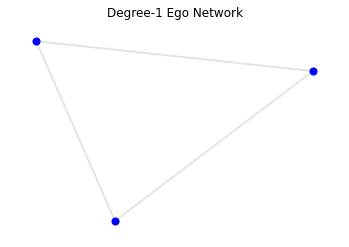

<Figure size 432x288 with 0 Axes>

In [5]:
# Get the depth-1 ego network of purchasedAsin from copurchaseGraph
n = purchasedAsin
ego = networkx.ego_graph(copurchaseGraphBooks, n, radius=1)
purchasedAsinEgoGraph = networkx.Graph(ego)
pos = networkx.layout.spring_layout(purchasedAsinEgoGraph)
M = purchasedAsinEgoGraph.number_of_edges()
nodes = networkx.draw_networkx_nodes(purchasedAsinEgoGraph, pos, node_size=50, node_color='blue')
edges = networkx.draw_networkx_edges(purchasedAsinEgoGraph, pos, node_size=50, edge_cmap=plt.cm.Blues, width=2, alpha=0.1)
ax = plt.gca()
ax.set_axis_off()
plt.title('Degree-1 Ego Network')
plt.figure(0)
plt.show()

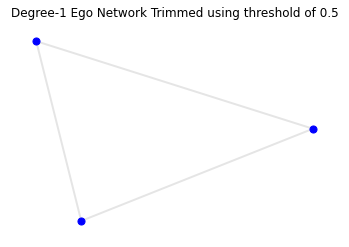

In [6]:
# Use the island method on purchasedAsinEgoGraph to only retain edges with Threshold >= 0.5
threshold = 0.5
purchasedAsinEgoTrimGraph = networkx.Graph()
for f,t,e in purchasedAsinEgoGraph.edges(data=True):
    if e['weight'] >= threshold:
        purchasedAsinEgoTrimGraph.add_edge(f,t, weight=e['weight'])
pos = networkx.layout.spring_layout(purchasedAsinEgoTrimGraph)
M = purchasedAsinEgoTrimGraph.number_of_edges()
nodes = networkx.draw_networkx_nodes(purchasedAsinEgoTrimGraph, pos, node_size=50, node_color='blue', label=True)
edges = networkx.draw_networkx_edges(purchasedAsinEgoTrimGraph, pos, node_size=50, edge_cmap=plt.cm.Blues, width=2, alpha=0.1)
ax = plt.gca()
ax.set_axis_off()
plt.title('Degree-1 Ego Network Trimmed using threshold of 0.5')
plt.figure(1)
plt.show()

In [7]:
# Get the list of nodes connected to the purchasedAsin
purchasedAsinNeighbours = purchasedAsinEgoTrimGraph.neighbors(purchasedAsin)

In [8]:
# Get Top Five book recommendations from among the purchasedAsinNeighbours based on one or more of the following data of the 
# neighbouring nodes: SalesRank, AvgRating, TotalReviews, DegreeCentrality, and ClusteringCoeff

# Accessing metadata with ASIN in purchasedAsinNeighbours
AsMeta = []
for asin in purchasedAsinNeighbours:
    ASIN = asin
    Title = amazonBooks[asin]['Title']
    SalesRank = amazonBooks[asin]['SalesRank']
    TotalReviews = amazonBooks[asin]['TotalReviews']
    AvgRating = amazonBooks[asin]['AvgRating']
    DegreeCentrality = amazonBooks[asin]['DegreeCentrality']
    ClusteringCoeff = amazonBooks[asin]['ClusteringCoeff']
    AsMeta.append((ASIN, Title, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff))
    
# Sorting the top five nodes in purchasedAsinNeighbour by Average Rating then by TotalReviews
T5_byAvgRating_then_byTotalReviews = sorted(AsMeta, key=lambda x: (x[4], x[3]), reverse=True)[:5]



In [9]:
# Print Top 5 Recommendations

print('\nTop  Recommendation by AvgRating then by TotalReviews for Users Purchased the book:')
print('\n------------------------------------------------------------------------------------')
print('ASIN\t', 'Title\t', 'SalesRank\t', 'TotalReviews\t', 'AvgRating\t', 'DegreeCentrality\t', 'ClusteringCoeff')
for asin in T5_byAvgRating_then_byTotalReviews:
    print(asin)


Top  Recommendation by AvgRating then by TotalReviews for Users Purchased the book:

------------------------------------------------------------------------------------
ASIN	 Title	 SalesRank	 TotalReviews	 AvgRating	 DegreeCentrality	 ClusteringCoeff
('1559361247', 'Sex, Drugs, Rock & Roll', 444861, 3, 5.0, 3, 0.83)
('1559360968', 'Pounding Nails in the Floor With My Forehead', 473331, 6, 4.5, 3, 0.83)


In [ ]:
#Music Recommendation

In [10]:
# Read the data from the amazon-books.txt and populate amazonProducts nested dictionary
# key = ASIN; value = MetaData associated with ASIN
fhr = open('amazon-music.txt', 'r', encoding='utf-8', errors='ignore')
amazonMusic = {}
fhr.readline()
for line in fhr:
    cell = line.split('\t')
    MetaData = {}
    MetaData['Id'] = cell[0].strip()
    ASIN = cell[1].strip()
    MetaData['Title'] = cell[2].strip()
    MetaData['Categories'] = cell[3].strip()
    MetaData['Group'] = cell[4].strip()
    MetaData['Copurchased'] = cell[5].strip()
    MetaData['SalesRank'] = int(cell[6].strip())
    MetaData['TotalReviews'] = int(cell[7].strip())
    MetaData['AvgRating'] = float(cell[8].strip())
    MetaData['DegreeCentrality'] = int(cell[9].strip())
    MetaData['ClusteringCoeff'] = float(cell[10].strip())
    amazonMusic[ASIN] = MetaData
fhr.close()

In [11]:
fhr = open("amazon-music-copurchase.edgelist", "rb")
copurchaseGraphMusic = networkx.read_weighted_edgelist(fhr)
fhr.close()

In [13]:
for i in amazonMusic.keys():
    print(i)

B00000AU3R
B00004W1W1
B000007R0T
B00005NTSV
B000002O8D
B00004W1WI
B00004W1WK
B00005ARCQ
B0000646IJ
B00003Q5AZ
B00003Q5AH
B00003Q5AA
B000000HFH
B000000HFB
B000003ONE
B000003ONN
B000003ONH
B00005R8FW
B000003ONP
B000000HF0
B0000262WI
B00002MO9L
B000023XRD
B00004T42Y
B00005LAPA
B00005LAPN
B00005LAPH
B0000506TM
B000068GAS
B000002NH0
B000068GAK
B00004TAU0
B000002ANX
B000002NHZ
B000068GA4
B000068GA5
B000002NHU
B000068GA3
B000002NHN
B000002NHJ
B000002NHO
B000002NHD
B000002NHF
B000002NHG
B000002NHC
B000002NHA
B00005QSS2
B00000I9P0
B00000I9P1
B000001VP6
B00000I9PK
B000001VP0
B0000296JH
B000004BTK
B0000296JO
B0000296JB
B0000296JD
B0000296JC
B0000296JF
B0000296JU
B000054483
B0000296JW
B0000296J9
B0000296J5
B0000296J3
B000004BTI
B000000WID
B00000K2C1
B00006GA32
B00000K2C5
B00000K2C9
B000006DGD
B00000JHXU
B00005KB59
B000002VTR
B00005KB5Q
B0000648L1
B00000K2CD
B00000K2CG
B00000K2CH
B00000K2CM
B00000K2CW
B000001OOZ
B000001OOP
B000002V0L
B000002V0M
B000002V0O
B000002V0N
B000002V0I
B000002V0H
B000002V0K

B000006YIR
B000001MRM
B00005NWNU
B00000G76N
B000089J10
B000089J12
B00006YXC0
B000000XJ9
B000000XJ3
B000000XJ5
B000003GXV
B000003GXT
B000003GXU
B000003GXQ
B000003GXZ
B00005NC3B
B00004S92I
B000003GX1
B00004S92N
B00004S92F
B000005SBZ
B000000XJB
B000000XJG
B00006YXCD
B00006YXCL
B00005V0Y6
B00006YXCC
B00004SSVW
B00006YXCH
B00006YXCK
B00005NEQH
B00005NEQE
B00005NEQG
B000024KW1
B000003ZT5
B000005TN5
B000005TN1
B000005TN3
B000025C3V
B00005YNCY
B0000016NX
B000006ZZD
B00005OR53
B000067O2U
B000067O2V
B000067O2T
B00000342T
B000067O26
B00000342L
B00000342H
B00006ANVQ
B000007QK5
B000007QK4
B000007QK6
B00008L3Z6
B000031VQJ
B00008L3ZS
B00005Y6R2
B0000014CK
B000001UW7
B000007QKC
B000007QKB
B000007QKD
B000001PY1
B00006GELL
B000006TK7
B00000JB44
B00000JB45
B00000JB43
B00000JB49
B00005B7V4
B000059T84
B000059T86
B000059T85
B000059T80
B000059T81
B0000014CY
B000058AWL
B000059T8F
B00005B7V1
B000059T8L
B000059T8T
B00000JB4A
B000006TKC
B00007L4Q3
B000006TKB
B00006GEL5
B00003WGHQ
B000067G1N
B000067G1L
B00003XASS

B000094Q56
B000000X5X
B000000X5Z
B000000X5F
B000000X5L
B000000X5K
B00000336C
B0000024T5
B00005QDYW
B0000024T9
B00005AXAJ
B00004YM25
B00004XNAY
B000008MDH
B000008MDF
B000053IG3
B000056MQ6
B00001U071
B00004L89L
B000056MQK
B000056MQD
B00004U2ZY
B0000031C4
B00004SZD9
B000004509
B000001HNH
B00006H6A0
B00004SZDP
B0000046P6
B00004SZDO
B00004SZDI
B00004SZDM
B00004SZDD
B0000259T3
B00006JSC4
B000002WZO
B000002WZW
B000002WZI
B000002WZU
B000068TO2
B000002WZP
B00006J9G4
B000002WZQ
B00005S7WN
B00006JSCQ
B0000046PE
B00006JSCY
B00006JSCD
B000002WZ3
B00006JSCN
B00006JSCM
B00006JSCK
B00006JSCL
B000003H18
B00004TUVO
B00004TUVV
B00000JC92
B00000JC91
B000009RML
B000009RMJ
B000065T1Z
B000065T1X
B000065T1Y
B000065T10
B00000JC9S
B00000JC9K
B00000JC9J
B000007ON0
B000007ON1
B00000JC9L
B00006ALCK
B00000G7IX
B000008P4D
B00003ZL33
B00003ZL3M
B00003ZL3A
B00003ZL3V
B00003ZL3R
B00006JJ9D
B00005A4D3
B00005073G
B00000B5IZ
B000050739
B00005NPIX
B000001ID7
B000025OLO
B000001IDO
B000001AYD
B00000JYA2
B00004TVV2
B000003CZU

B00005LZVM
B00006BGW7
B00005J9HW
B00005J9HJ
B00005J9HI
B00005J9HM
B000009N2U
B000003DUZ
B000009N25
B00004TJLD
B000001Y88
B00000BIBQ
B00000BIBU
B0000589UQ
B00008UANY
B000002RAB
B000004BFY
B0000589UT
B0000589UK
B0000589UH
B00004W9XJ
B00005M90K
B00005M90L
B00006HBNM
B00004WH0D
B000002KYC
B00005R8OB
B00005AVO2
B00004NRXM
B000007XBP
B00005R8OI
B000007V4S
B0000563RJ
B00004Y3CD
B00005NF44
B000066JR1
B000053F75
B00004RCRH
B000050ANY
B00005MNCL
B000000UV4
B000003A16
B000000UVT
B000000UVS
B000000UVQ
B000000UVY
B00003OP5I
B000003A1E
B0000041BY
B0000041BX
B0000041BS
B0000041BR
B0000041BU
B0000041BW
B0000041BH
B0000041BB
B0000041BE
B00006SM6S
B0000041BD
B00006SM6R
B00000618X
B00000618L
B000006180
B000006189
B000001FY1
B00009KTWB
B000006CH7
B000002G0M
B00004YMJ0
B00005R1PM
B00004YMJQ
B00005R1PZ
B0000029YI
B000002ZPG
B0000023F9
B00005R1PQ
B000056B2R
B000002ZPZ
B000002N05
B000009QPI
B00000J5XT
B00004W1JK
B000050AN9
B000009QPE
B00000J5XX
B00005IBWC
B00005IBWX
B00005IBWD
B0000029Y8
B00005NTOZ
B00005NTOY

B00000GBF2
B0000667Z1
B00003W0Y3
B000065EAT
B00005O6HQ
B00005NTTQ
B00006GE1L
B0000006NI
B000065SWT
B0000006NS
B00004S5Z6
B00004S5Z2
B00008PT8V
B00000JPMO
B000006ZA4
B000003TK6
B000003TKY
B000003TKA
B000003TKG
B000003TKN
B000027F62
B000063CKL
B000063CKM
B00005ABH3
B00002Q3IH
B000001ZQP
B00005OMHF
B000002BLF
B000002BLB
B00000G2F3
B00004Y1T7
B000024SHG
B000002BLQ
B00002669Y
B000002BL5
B00005LVUC
B00005OMHT
B00004R2HH
B00005OMHS
B000066NX5
B000002YMP
B000005IY8
B00004SW9P
B00004SW9S
B00004SW9U
B00004SW9R
B00004TSI8
B000005IY0
B000005IYY
B000005IYU
B000005IYW
B000005IYP
B000001GGI
B000005IYR
B000005IYL
B000005IYJ
B000005IYO
B000005IYF
B000005IYD
B00004YKY5
B000005IYG
B0000288SC
B000024ZC4
B000024ZC6
B000002YM1
B000002YM3
B00005Y0Q3
B00005Y0Q5
B00005Y0Q4
B00000364M
B00004T8RK
B00005Y0QH
B000027HZY
B0000013VQ
B00003CK7L
B00004YWWV
B000000PER
B00005NG6W
B000087BHE
B00005LNO6
B000002U94
B0000034L0
B00000I0G9
B00004RCD8
B000000ZI9
B00004SUA2
B00004SUA0
B000000ZI5
B000000ZI1
B00004SUAG
B000000ZIK

B0000931LL
B0000560RE
B00002ZZ7E
B0000560RR
B0000560RY
B0000560RX
B00005NSR0
B000005AF4
B00005ABO3
B000005AF5
B00004T02V
B000005AF0
B00005NHK8
B00005NHK9
B00005NHK0
B00005UK1U
B00004T0V0
B00005NHKN
B00005NHKL
B00005NHKH
B00005NHKJ
B00005NHKF
B00005NHKG
B00000INI8
B000007V8U
B000000SAH
B000007V8T
B000007V8Y
B00005NHKR
B00001ZTKQ
B000002H6S
B0000007S3
B000003GJZ
B0000007S1
B0000007SY
B0000007SI
B000003GJR
B0000007SD
B00000202B
B00000INIU
B00001ZTKD
B00000INIR
B00000G1IW
B00000G1IY
B00000G1IU
B00000G1IA
B000005CM3
B00000G1IH
B00000G1IK
B00000G1IL
B000002RTZ
B000002RTX
B000002RTW
B000002RTQ
B00004TYAO
B000002RTR
B000002RTL
B000002RTJ
B000002RTK
B000002RTF
B00004TYA8
B000002RT9
B000002RT6
B000065C4X
B00000G1I9
B00000G1I8
B000065C4I
B00004T02C
B00004Z51E
B0000249P9
B00004Z51B
B000059GDO
B00004Z51W
B00004Z51R
B000059PEG
B00004Z518
B00000049B
B000059PEM
B00005K31Z
B00006RYBS
B00006RYBP
B000005M3T
B000083F52
B000000NFJ
B00000B22D
B000000DB1
B000001RV3
B00004WLEU
B00004Y3L4
B000001RVK
B00006358E

B000050HYI
B00000JWIN
B00000JWIW
B000050HYX
B00000JWIV
B00000JWIU
B00005N8QU
B00000JWIS
B00000JWIZ
B000050HYQ
B00004WJ8B
B00004VXCC
B00004WJ8I
B00004VXCG
B000002KBW
B000054BFF
B00005RFCA
B000000ADN
B000000ADC
B000000ADG
B000000ADF
B000000ADP
B00000G2EZ
B0000008WZ
B000008LZG
B000008LZA
B00000B3I1
B000002V95
B000005EPC
B000005EPF
B000005EPD
B000005EPE
B000002KBX
B000002G2I
B000002G2G
B000002G2B
B00004Z4YL
B00004TR12
B000002G2U
B000002G2R
B000002G2Q
B000002G2P
B000002G28
B000002G26
B000002G23
B000000T45
B000067NVH
B00004S8YF
B00004S8YE
B000026YOI
B00005M68X
B0000073NS
B00005M68W
B00005QJOI
B0000073NB
B0000073NL
B00005LPW9
B0000073NK
B000063NH0
B000059O1V
B000001F07
B00000G5WY
B000001F0H
B00000I8AY
B000001F0C
B00000G5W9
B00000IOAF
B00000IOAD
B00005LPWX
B00000IOAU
B000008PR1
B000059O1I
B00008LPDC
B000000T4A
B000005FVD
B000000T4C
B000005FVB
B00003XAVZ
B00004Z4Y8
B000001ANK
B0000015DJ
B0000015DL
B00005YBWO
B000001ANF
B00006F2YL
B00000I5EM
B00005ORB1
B00004W4MC
B00004W4MD
B00005O0VL
B000053GU2

B000023VSV
B000023VST
B000023VSW
B000023VSR
B000023VS1
B0000084JW
B000066RLK
B00006S213
B00004X0LF
B00004X0LY
B00004X0LW
B00004X0LZ
B00004X0LS
B000000K03
B00004X0L4
B00004X0L1
B00004X0L2
B00000J758
B000031KHL
B000003H8S
B000003H8R
B000003H8B
B000003H8H
B000003H8K
B000003H8O
B000003H8N
B000003H85
B000003H84
B0000060J3
B0000060J7
B0000060J8
B00000JQIN
B00000JQIE
B0000060JH
B000005J34
B000005J35
B000005J39
B000005J38
B00005A7KB
B00006HCUB
B000005J3Q
B000005J3P
B000005J3V
B000005J3Y
B000005J3T
B000005ECD
B000005J3A
B000005J3B
B000005J3D
B000005J3C
B000005J3K
B000005J3J
B000005J3N
B000005ECO
B000056CD3
B000063VR8
B00004SBWG
B000003OLG
B00000DWFR
B000003OLO
B000003OLM
B000003OLS
B000003OLQ
B000003OLW
B000003OLU
B000003OLZ
B000003OLY
B000005ECX
B000056CDA
B00005Y8JY
B00005LAR0
B00005Y8JQ
B00005UFE9
B000001H9X
B00005LARV
B00005LARZ
B000002NJ8
B000002NJ9
B000002NJ2
B000002NJ7
B00006HCU1
B00003IQO1
B00002DD6O
B000051XQZ
B000002NJW
B000002NJJ
B000002NJS
B000002NJT
B000002NJH
B000002NJM
B000002NJI

B000062UW6
B00005V9TX
B00004HYOY
B00004HYOV
B00004HYOK
B00004HYOA
B000001DU7
B000007XQJ
B000059QY8
B00005NW7M
B000003CI8
B00003O9J3
B000066C3B
B00000G8G3
B000023ZMH
B00003O9JX
B00003O9JI
B00000721E
B000002IYS
B00008L3T7
B000031VWH
B00006JR0C
B00005BC5B
B00006JLPI
B00008J2WD
B000002IYC
B0000584K3
B0000041TD
B0000074G8
B000002IY3
B00006GEJV
B00000JB6A
B000006TIQ
B000006TIP
B000006TIR
B00006GEJZ
B000006TIL
B0000074G1
B000006TIO
B00006GEJN
B00003WGNS
B00003WGNR
B00003WGNV
B00005AA1X
B00003WGNX
B00003WGNO
B00003WGNM
B00003XAQ5
B00003XAQ6
B00005AA17
B00005AA10
B00007FOMQ
B00007FOMP
B00000JYZA
B00000JYZQ
B000005MFS
B00000JYZ0
B00008W3WG
B00008W3WA
B00008W3WF
B000002OPX
B00000616T
B0000509EZ
B000002SNJ
B0000633G9
B00000I930
B00005K8S0
B00000616B
B000002SNB
B000005YZ6
B000026C9S
B000005YZ7
B0000058ME
B000005YZF
B0000058MG
B0000058MM
B0000058MO
B000005YZM
B0000058MK
B000005YZR
B0000058MU
B0000058MW
B0000058MQ
B0000058MS
B0000058MY
B000006081
B00001T3A9
B00000I2T0
B00000I2T3
B00001T3A6
B00000I2TN

B00005JSVQ
B00000AEWA
B000059X50
B00005JSVA
B00005I47L
B00005I47C
B00005JSVK
B00006352B
B00006352C
B00004TXZK
B00004TXZI
B000001C94
B000002ZD9
B0000029UA
B0000029UB
B000002ZDA
B0000029UH
B000025UEI
B000002ZDU
B0000029UU
B0000029UW
B00005Q3W0
B000002ZDX
B0000040RC
B000002ZDZ
B00000DAYJ
B000063526
B00000IXL1
B00004Z3U3
B000000V58
B00006F87A
B000003OP7
B00006F87L
B00006F87X
B00006F873
B00006F876
B000003OP9
B00002SWJF
B000059LBD
B00002SWJK
B00002SWJT
B00002SWJW
B0000081PB
B00002SWJX
B000062WDE
B00005TPHZ
B000050A4C
B000007T54
B00006ALV2
B000002M5M
B000002M5N
B000069AU0
B000002M5D
B000001SE0
B000002M5B
B000002M5T
B000002M5U
B000002M5W
B000002M5R
B000002M5Q
B000002M5S
B00005NG57
B000001SEO
B000002M51
B000002M50
B000007T5P
B000007T5A
B000002HAP
B000056HDA
B0000005H8
B00004S2PJ
B00004S2PI
B0000005H1
B0000005H0
B0000005H6
B0000005H7
B0000042GS
B00000DD6V
B00000DD6T
B00000DD6Y
B00000DD6G
B0000005HO
B00004S2P7
B00004S2P0
B0000005HQ
B0000005HR
B0000005HW
B00000IQMP
B00008V71L
B000050I3D
B000050I3G

B0000544DV
B00005RG4V
B0000544DM
B0000544DO
B0000544DI
B0000544DJ
B000002PIQ
B000002PIU
B000002PIY
B000002PIB
B000002PIF
B000000XW1
B00005YDN5
B00004ZC42
B00005R18Z
B000050ICX
B000024Y6A
B00005J71X
B000002RUY
B000005P64
B000005P62
B00004Y6SN
B000005P66
B000066SJ0
B000054OXV
B000066SJS
B00006AKPF
B000066SJY
B000066SJZ
B00006AKPX
B00006AKPY
B000066SJL
B00005BGCL
B000005P6Q
B000066SJO
B00005G4HO
B000005P6Y
B000005P6G
B000005P6C
B000005P6I
B000005P6M
B000054OXU
B00005JJRC
B00005UJ8J
B00005UJ8K
B00004GOWK
B00000GBC9
B000001N5U
B0000004RW
B0000004RU
B0000004RQ
B0000004RY
B0000004RD
B0000004RO
B0000004RM
B00004GOWH
B000001YJU
B0000004R4
B0000004R2
B0000004R0
B0000004R8
B00002R0M6
B00002R0M2
B000051Y46
B00004DTQS
B000051Y42
B00004SVCX
B00004SVCJ
B00004SVCM
B00004SVC3
B000056NUE
B000005TSF
B00002R0MC
B000051Y4N
B00002R0MA
B00002R0MO
B00002R0MR
B000051Y4W
B000051Y4Y
B00002R0MZ
B00002R0MY
B00004U5DC
B00004RBH2
B000005NLX
B00004RBHN
B00004RBHD
B00000A7UG
B000063TDR
B000000Z1W
B000001QA1
B000000Z1V

B00004ZEJK
B00004ZEJL
B00004VW4Q
B00004VW4S
B00004VW4R
B00004VW4U
B00004VW48
B00004VW45
B00004VW47
B00004VW46
B00004ZEJ2
B00004ZEJ0
B00004ZEJ7
B00004ZEJ9
B00005QDHV
B00005QDHT
B00004SQWQ
B00005QDHU
B000025BH7
B00005QDHK
B00005QDHF
B00006DIDA
B00006DIDF
B00006DID9
B00005QDH7
B00005QDH0
B00000IAI4
B00000IMFL
B00005QKAL
B00000IMFY
B00000IMFZ
B00000IMFT
B00000IMFU
B00008BXC5
B00004ST43
B00004ST4T
B00004ST4W
B00004ST4U
B00004ST4V
B00004ST4Q
B00000K1N8
B00004ST4S
B00004ST4R
B00004ST4X
B00004ST4Y
B00004ST4Z
B000001D3N
B000001D3J
B00005QKA8
B00000IMF4
B00000IMF7
B00000IMF0
B00000IMF3
B00005N6MO
B00006BCNP
B00004TVES
B00000IFTY
B00004TVEY
B00005NGZ4
B00004TVE5
B00005073Y
B00005NGZ3
B00006BCN1
B00006BCN0
B00000748I
B000001GI3
B00005Y48O
B00005Y48M
B00005Y48V
B00005Y48W
B000087J7U
B000058TF1
B0000018RH
B000001GIJ
B000001GIH
B000001GII
B000001GIN
B000001GIO
B000025Z8C
B00000G641
B000000197
B000050732
B000068ZR1
B00004X08F
B00004UFA8
B000003W72
B00007J5U9
B00004S849
B00001NTSK
B000003MS8
B00000III2

B00001ZU5T
B00003IQJW
B00004TSB0
B000009OIN
B00006411R
B00006411T
B000031WNY
B00000379W
B00000379S
B00000379G
B00000379L
B00006JK9X
B00006JK9Z
B00002EPQ1
B00006JK9R
B00000IXY6
B00005AMAG
B00004XSN5
B00004XSN3
B000004218
B00008PX93
B00000421M
B00000421A
B00000421O
B00004XSNH
B00004XSNJ
B00000421G
B00004XSNZ
B00006JK96
B000068OSH
B000001CWI
B00000JSBR
B0000666AS
B00005RSEK
B000068OSJ
B00005K2UE
B00005K2UD
B000002H4O
B00006RSMP
B00005K2UY
B00005K2U3
B00005K2U5
B00005K2U7
B00005K2U9
B000001CW0
B000001CW5
B000001CW6
B0000630U0
B000005H2V
B000005H2R
B000005H2P
B000005H2Y
B000005H2C
B000005H2H
B000005H2J
B00000JLH7
B00006LSKR
B00000JLH5
B00004X0QV
B00001ZU54
B00000IA3A
B000068FUB
B000063TQV
B000001C1Z
B00000I7A6
B00000DFVT
B00000DFVP
B00000DFVU
B00000DFVV
B00000DFVS
B00000DFVZ
B00005MF3R
B000001C1D
B00000DFVF
B00000DFVI
B00000DFVK
B00000DFV1
B0000026TY
B000020602
B00003Z9U5
B000051JTJ
B000051JTD
B000051JTC
B000051JTX
B000003IAR
B00005QJ24
B00006JIAP
B00006JIAX
B00006JIAF
B00006JIAO
B00006JIAJ

B00003L9GQ
B000005JXG
B00008V62L
B00005NNQL
B00005M961
B00004S52T
B000003TS3
B00004S52R
B000003TS6
B00005KCNC
B00004UAKV
B000009DUY
B000046PT5
B0000266QX
B000005IAB
B000002BT9
B000002BT5
B000002BT3
B000002BT1
B00004WF29
B00004WF25
B00004WF26
B00004WF20
B00004WF2X
B00004WF2P
B00004WF2Q
B00004WF2I
B00004WF2B
B000002BTM
B000002BTO
B000002BTH
B000002BTK
B000025M5J
B000025M5F
B000002BTF
B0000508PX
B000002VHQ
B00000IHMI
B000003JTW
B000003JTU
B000003JTY
B000001UEJ
B000003JTC
B00000IHM2
B000003JTK
B00005O065
B00004UAKC
B000026EHK
B000083MF7
B00005NTP7
B00005YDPK
B00000I5RV
B000024157
B00005YWOT
B00000GBK9
B00000GBK6
B00005K8AD
B00005K8AY
B00004W1EB
B00004W1EE
B000067CQK
B000067CQH
B000067CQ3
B00005NB6H
B00000G91S
B00000G91R
B0000261I1
B00000G91M
B0000071BS
B00005ALC4
B00006JXY9
B00006JXY8
B0000034TI
B0000034TK
B0000034TP
B0000657WB
B00005V6R6
B0000034T4
B00004X0IZ
B00000I41H
B00005ALC0
B00005MIV2
B00006RHA1
B00006RHA0
B000053UDL
B00004X0IB
B000053UDN
B0000646WZ
B00002ZZZ5
B0000003HW
B00002ZZZY

B00005MK4O
B00005MK4N
B00005MK4C
B00005MK4B
B00005MK4G
B00001ZWIL
B000001V52
B000001V51
B000027826
B00000267Z
B0000027P7
B0000027P1
B0000027P3
B0000003F4
B0000560H8
B00005A47N
B00005A471
B00005A472
B00005A475
B00005A478
B00005A474
B000002XIQ
B0000027PJ
B0000027PU
B0000027PW
B0000027PY
B00005NP6F
B00005NP63
B000025XKM
B000007WDR
B0000300M0
B0000300M8
B000000SE4
B00005B1FM
B000007WD7
B00002MF9M
B0000034PC
B00004TEQ0
B000000M27
B000001HEH
B000001HEM
B000001HET
B00004T6Y9
B00002782C
B000001E53
B000001HE6
B000000M2A
B00000IMYA
B000000M2H
B000000M2O
B000000M2L
B000000M2X
B000001E52
B000001QJ9
B000001QJ4
B000058AB0
B000001QJ1
B000006OA6
B000006OA8
B000001E55
B00000AEQ6
B00000AEQ2
B00000AEQ9
B00000AEQF
B00000AEQL
B00000AEQO
B000006OAB
B000006OAG
B000006OAC
B000006OAD
B000006OAJ
B000006OAO
B000001QJL
B000006OAM
B000001QJN
B000006OAS
B000006OAQ
B000006OAW
B000006OAX
B000001QJG
B000006OAU
B000001QJB
B000000SEA
B00006F2KY
B000056NKY
B000025D37
B000056NKS
B00000281P
B0000047YZ
B00004SUVJ
B0000013NH

B00005AQ0E
B00005B45E
B00005B45N
B00005B45B
B00005B45M
B00005B45K
B0000057X1
B00000IKJE
B0000057X7
B00005B45Y
B00004U1TK
B00005YU9G
B00000IO9Q
B00000IO9V
B000003WB2
B00000IO9C
B00000IO9B
B00000IO9D
B00000IO9E
B0000026JO
B0000026JI
B0000026JN
B0000026JS
B0000026JR
B0000026JP
B0000026JV
B000000YYX
B0000026J2
B0000026J1
B0000026J6
B000000YYJ
B0000026J9
B00000IO97
B000003WBG
B00000IO96
B00004TB6H
B00006I0D4
B00004TJ0C
B00006I0D5
B00004UEFO
B00004UEFD
B00004UEFU
B00004UEFP
B00005M6P1
B000007361
B00005M6PL
B00000736K
B00000736G
B00000736A
B00000G5OA
B00000G5OC
B00000G5OF
B00006IQGB
B00006I0DC
B00006I0DB
B00006I0DO
B00006I0DK
B000024INA
B0000300C6
B00002DDDY
B000001AJE
B00005BL2A
B00000AEF4
B00000IGL5
B00002DDD0
B00005ASH5
B000001AJU
B000066BZT
B000066BZP
B000066BZR
B000066BZQ
B000005TY6
B000066BZZ
B000066BZC
B0000520YL
B000005V9V
B000066BZO
B000066BZI
B0000520Y4
B00000IGLP
B00005ASHL
B00004YRW7
B00003GPNV
B00006J3YC
B000005ZD3
B00000GV5X
B000002WDC
B000005ZD6
B00008YJQW
B00008NGF0
B00005NICX

B00006L74Z
B0000206C9
B000006XBR
B00006L74I
B00003TKHW
B000009V0M
B000009V0O
B0000206CF
B000009V0Y
B00004VWCP
B00004VWCB
B00004VWCC
B00000G837
B00000G834
B000003OTH
B000003OTJ
B000003OTK
B000003OTF
B000003Q4E
B000003OTP
B00004TTIQ
B00005AFQY
B00005AFQW
B0000027L0
B00003JAGN
B00005AFQC
B00000JOQ3
B000001JO0
B00000AF9W
B0000019YG
B0000019YK
B00000AF9B
B00005QK48
B00005QK45
B00000AF9L
B00005QK46
B00005QK4L
B00000AF96
B00000AF92
B00000AF94
B00000AF95
B00000AF90
B000000HXK
B00000AF98
B00000AF99
B000000HXX
B00005QK4Z
B00005QK4U
B00005QK4W
B00005QK4T
B00005QK4V
B000066APP
B000075AT9
B00004S9UJ
B00004S9UH
B00005KJ0F
B00004NHDD
B00005KJ0C
B00005KJ0N
B00005KJ0J
B00005KJ0K
B00004NHDH
B00005KJ0I
B000001H5P
B00005KJ0T
B00005KJ0U
B00005KJ0P
B00005KJ0X
B00005KJ0Q
B000000K4V
B000000K4U
B00005KJ05
B00005KJ02
B00005KJ03
B00005KJ01
B00004TCWY
B00005KJ08
B00000FC8X
B00006C2QG
B0000033OD
B0000033OB
B0000033OC
B0000033ON
B0000033OM
B0000033OK
B0000033OJ
B00000378X
B000003G71
B0000033OZ
B0000033OY
B00001X58X

B000009NJA
B00000IPA0
B00004W1KS
B00004T449
B00002MCT1
B000005S5M
B00000IPAX
B00000IPAQ
B00000IPAL
B00000IPAD
B000000J29
B00000IPAB
B00000IPAC
B000000J24
B000000J26
B000006AHO
B00000JMGB
B00000JMGA
B00000JMGM
B00000JMG3
B00000JMG2
B00000JMG5
B000006AH7
B000006AH4
B000000J2J
B000000J2K
B0000016JR
B0000016JQ
B00002M7YH
B000001FIT
B00002MOOT
B00004VMRW
B0000016J3
B000000KB5
B0000562BP
B0000282ZF
B00005O7X5
B0000562BK
B00000DGQZ
B0000562BJ
B00004RJQG
B00004RJQV
B00004RJQT
B00004RJQX
B000000KBP
B00005O7XR
B00005O7XP
B00005O7XO
B00005O7XI
B00000DGQ3
B00000C2DN
B00006AAP7
B00006RY6K
B00006RY6M
B00004SUD1
B00006RY6V
B00006RY62
B00006RY64
B00007K7J8
B00007K7J2
B00007K7J0
B00004YWNJ
B000068FO7
B000002S47
B00005O4TD
B000068FO8
B00005O4TF
B000042O8L
B00004YWNQ
B0000695KW
B000068FOP
B000024N8B
B000002S4W
B000001NQU
B000002S4T
B000002S4P
B000042O86
B000002S4L
B00004YWN8
B00004YWN9
B000068FOC
B00004YWN2
B000002S4D
B000002S4J
B000068FOO
B000063DVY
B00005O4T7
B000005S5U
B000001NQP
B00005LJ13
B000006EAL

B000062Y8C
B000062Y8B
B000062Y8M
B000062Y8O
B000062Y8K
B00004WIP4
B00004WIP5
B00000JIMF
B00004WIP7
B00004WIP9
B00004WIPE
B00004WIPF
B00006AG9K
B000062Y85
B000062Y87
B000062Y81
B000062Y89
B000062Y88
B00000JAXZ
B00005KJ0Z
B0000089F6
B0000089F2
B00004NHDY
B00000JPBF
B000065V7U
B00000JPBM
B00000JPBN
B00006JNGM
B00000JPBW
B00000JPBR
B00000JPBX
B00005NKJ7
B000006L18
B00000JPB2
B00000JPB4
B00006I082
B00000DCGV
B00006I085
B000000OPZ
B00006I089
B000000OPQ
B00000416J
B00000DCGZ
B000000OPU
B000000OPJ
B000000OPK
B000000OPH
B000000OPL
B000000OPE
B000056Q83
B000056WWX
B00000416R
B00000416P
B000056WW1
B000056WW5
B000056WW6
B0000630OG
B0000630OJ
B00006I08G
B00006I08K
B0000261UH
B000005QD5
B000003LBO
B00004SU7Q
B00000DZHG
B000004162
B000002IZ9
B000002IZ1
B000002IZ4
B000007224
B000007227
B0000033OA
B000002IZX
B000002IZT
B000002IZK
B000002IZM
B0000033OT
B000002IZO
B000002IZC
B0000033OR
B000002IZE
B00005QZ4B
B00004T2I1
B00004T2I7
B000003G77
B00006GOFR
B00005PJI5
B00005YTE6
B00006GOFX
B00004T2IT
B00006GOF2

B00006SF8J
B00000311Z
B000000BNH
B00004XPU5
B00004XPU6
B00004XPU4
B00004XPUK
B00005YSVM
B00007BH43
B0000058H4
B00007BH4E
B00007BH4O
B00007BH4H
B00007BH4Q
B00007BH4Z
B000002DT5
B000002DT0
B000002DT9
B00004T1DJ
B000005RJ1
B00004Z3TW
B000005RJ9
B000005RJD
B000005RJA
B00005NC1G
B000005RJI
B000005RJH
B00000JFG3
B000002DTV
B000068MM0
B000002DTB
B000025C5T
B000002DTK
B000063WFE
B000063WFF
B00002NDBM
B000000G0F
B00005MGBB
B00005MGB3
B00005MGB2
B00001T3FV
B00004ST1U
B00004Z3TN
B000002M6V
B00002ZZ21
B000006ROB
B000006ROW
B00002ZZ2L
B0000719TH
B00004UIGM
B00004T6KN
B000006YNQ
B00000AFEP
B00004U4F7
B00000AFEU
B0000010J7
B00000AFEB
B00000AFED
B0000010JP
B0000010JR
B0000010JU
B0000010JL
B000000JQQ
B000001MUX
B000006YN1
B000006YN2
B00000DCHC
B00006F2N6
B00005RRFY
B00005JT7U
B000000EHR
B000001NM6
B0000088TA
B00005AAFG
B000056NL4
B00005QDCH
B000053SLK
B000053SLI
B000053SLM
B000053SLE
B000006UMS
B00004HYJA
B000000EHD
B00004HYJ3
B0000008TV
B0000008TY
B0000008TE
B000005TK9
B000005TKO
B000005TKQ
B0000008T2

B00004TCQQ
B00000K4FO
B00004TCQY
B00000K4FG
B00000K4FL
B00004TCQA
B00000K4FD
B00000K4FX
B00004TCQE
B00000K4FS
B00004TCQL
B00000K4FR
B00000K4FV
B0000242JZ
B000001SFD
B000007T0R
B000007T0W
B00002SWO2
B00005YORT
B00002SWOA
B00002SWOE
B00002SWOP
B00002SWOU
B00002SWOV
B000001SF9
B000001L5T
B00000DD3W
B00000DD3O
B00000DD3B
B00000DD35
B00004TSDQ
B000001FPK
B000050I4L
B000050I4M
B000050I4H
B000050I4I
B000050I4J
B000050I4G
B000050I4F
B000050I4P
B000065CWJ
B00007KMOW
B00004S2SK
B00004S2SM
B00004S2SI
B000066SK2
B00004S2SU
B00007KMO1
B00004S2SZ
B00004S2SY
B000050I48
B000050I45
B000050I44
B00002MYX2
B00004YL6U
B00004YL6V
B000001OC8
B000002TLX
B000051TPE
B00004YL6O
B000002TLS
B000051TPK
B00004YL6K
B000059RUH
B000059RUP
B000059RUT
B000059RUZ
B000002EUJ
B000002EU5
B000002EU2
B000059RU3
B000002EU8
B000059RU1
B000059RU6
B000059RU8
B00004YL61
B00004YL69
B000024O8T
B000025SME
B00005EM3E
B00005QZLU
B00005QZLD
B00002MYXP
B00005QZLF
B00005QZLG
B00005QZLA
B00005LISA
B00005QZLH
B00005QZLJ
B00005QZLK
B00005QZL7

B0000544C3
B0000544C8
B000002AC9
B00000036G
B000002AC3
B000002AC2
B000002AC5
B000002AC1
B00004RJ6X
B00005JY4V
B00005JY4R
B000002ACX
B000002ACR
B000002ACS
B000002ACV
B000002ACP
B000002ACQ
B000002ACU
B000002ACT
B000002ACJ
B000002ACN
B000002ACL
B000002ACB
B00004TRPM
B0000544CB
B000005IRZ
B00004TRPW
B00004TRPT
B000058A7Y
B000005IRP
B000066SEG
B000005IRS
B0000631PI
B000002BE2
B00000DF8O
B00007E1KQ
B00005JI2N
B000005RVD
B000002MFU
B00001OH68
B00006JP0W
B00008A8HV
B00004TRRV
B00004YB9Z
B00004YB9Y
B000002YTX
B00000DF8I
B00004T40A
B00005NZJW
B00005NKGW
B00005NKGS
B000051Y7T
B000000OTW
B000051Y7G
B0000630C1
B000051Y7D
B0000630C4
B0000004W1
B00002R0NF
B0000004W4
B00002R0ND
B00004DTRC
B00002R0NE
B00004DTR7
B0000004WQ
B0000004WO
B000000OTY
B0000004WE
B0000004WA
B000051Y71
B00005MKTM
B000006P8W
B000006P8U
B000006P8S
B000006P8O
B000006P8M
B000006P8G
B000006P8A
B000006P8E
B000000362
B0000794FS
B0000022AJ
B000000364
B0000022A9
B0000022A3
B000000366
B000058ABR
B00000IWLA
B00005U0I6
B00000DF8X
B00004RCYA

B00000I399
B00002MDVZ
B00006ZSD1
B00002MDV2
B000056O1D
B0000061V1
B00000I39F
B000051Y7C
B000056O1Z
B00005T7SL
B000056O1X
B00000DOAK
B00006EXGX
B00006EXGY
B00006EXGQ
B00006EXGT
B00006EXGH
B00006EXGE
B00006EXGB
B00006EXG8
B00006EXG7
B00006EXG0
B000001I4G
B000001I4Q
B0000507CY
B0000507CQ
B0000507CM
B00001ZT0J
B00000IJ0P
B000001I44
B000001I42
B00000I0PJ
B000005JC5
B00005RDCL
B00004VW3K
B00005R67I
B00005YIPQ
B000000WQ8
B00008WJ8E
B000000WQ4
B00001ZT0L
B00000JO9Z
B00005MLXS
B00005MLXV
B00005MLXW
B00005MLXT
B00005MLXX
B00001NFHU
B00001NFHO
B00005MLXD
B00004SYHK
B00005MLXE
B00001NFHH
B00005MLXI
B00005MLX4
B00001NFH0
B00001NFH3
B00005MLX8
B000000WQL
B00006JYHM
B00006JYHO
B00006JYHD
B00005M1Z0
B00006JYHF
B00004TKOB
B00004TKOK
B00004TKOH
B00006JYHP
B000000HSX
B00000J864
B00000J860
B00000J86I
B00000J867
B00000J86H
B000003SI0
B00000J86B
B00000J86X
B00000J86G
B00004TKO9
B000001V9O
B00003TFVW
B000002QK0
B00005J7D6
B000002QK8
B00008GSAU
B00008GSAW
B00004Z3V3
B00004UFGW
B000002QKZ
B000002SA6
B000002QKG

B000056VLA
B0000589D8
B00007KSD8
B00000I88M
B00005J8IO
B0000589DQ
B0000589DE
B0000589DA
B00005L8RV
B0000589DI
B00000G13Q
B00006AMVV
B00006AMVW
B00000G13G
B00000JD2G
B00006AMVP
B000002XCK
B00005Y84R
B0000027ZV
B00005ALHN
B00005Y84H
B00005Y84C
B0000042N2
B0000042N4
B00005K2VP
B000046QA7
B00004XSIK
B00004XSID
B00004XSIT
B00004XSIS
B000005KPZ
B00005J9XE
B00000G2Q5
B00005J9XS
B00005J9XO
B00005J9XP
B00005J9XR
B00005J9XW
B00005J9XZ
B00005J9XX
B00005J9X2
B00006IMA0
B00005J9X7
B0000042NW
B0000042NY
B000026O4B
B00004XSI8
B00005ALHY
B00002MTB0
B00000JDBN
B000059T22
B00005BGTV
B000009D6X
B000059T24
B00000JLMX
B00000JLMQ
B00002SSPC
B00000JLMP
B00000JLML
B00000JLMH
B00005K2Z3
B00005K2Z4
B00000JLMC
B00005K2Z6
B00000JLMD
B00000JLMF
B00000JX6H
B000001CXD
B000001CXA
B00000IJAS
B00005K2ZI
B00005K2ZL
B00000JLM1
B00005K2ZE
B00005K2ZG
B00005K2ZS
B000005H58
B00005BGT4
B000005H54
B000005H50
B000005H5Y
B000005H5T
B000005H5U
B000005H5M
B000005H5L
B000005H5N
B000005H5O
B000005H5D
B000005H5F
B00006LSNI
B00006LSNK

B000003TVE
B000003TVK
B000003TVM
B00003L9DA
B00004WF5F
B00004WF5N
B00004WF5C
B00004WF5I
B000006YYQ
B00004WF5J
B00004WF5Q
B00000JZQI
B00000JZQZ
B0000584V6
B00004WF55
B00004WF51
B000000NN1
B00000DPKH
B00000DPKG
B00000DYP5
B000005IF3
B000005IFA
B000005IFC
B000005IFY
B000005IFZ
B000005IFT
B000005IFQ
B000003JW1
B00005OAJO
B0000634G7
B00004YTWC
B00000HZ3R
B000056KUW
B00005K8BC
B00002410H
B000059XED
B00005K8B0
B00005K8B6
B00000GBNY
B000000QIM
B000001KVO
B000001KVE
B00000JFY2
B00000JFY0
B000001KVW
B00000JFYG
B00000JFYD
B00000JFYT
B000001KV0
B000001KV4
B00000GA2I
B000067CR4
B00000GA2N
B00004SGOB
B000000EYW
B00004W1FV
B00004W1FJ
B00000IPA1
B00004W1FI
B00006LI62
B000000L2P
B00000IACT
B000008TQJ
B00005MG93
B00005MG91
B00005MG90
B000059MA4
B00005V6Q7
B000001J6G
B000053UCM
B0000646XN
B000001J6O
B0000646XA
B000001J6M
B000001J6U
B000001J6S
B00005QJ1X
B00005MG9T
B00005V6QB
B00005QJ1U
B00003Q56G
B00005V6QG
B00005QJ1T
B00005V6QE
B000034D5G
B00003Q56S
B00005QJ1F
B00003Q56W
B00005MG9O
B000005JB6
B000005JB1

B00000183C
B00000183F
B00000183A
B000002SCP
B00006LV77
B000002EMY
B00004TWR8
B00003OSYI
B00004TWR0
B000068WBL
B00004TWRE
B00004TWRQ
B000005HE6
B00004TWRW
B00004TWRR
B00000J8EY
B000000JJQ
B000063TD5
B00005U4W7
B00005U4W3
B000026I1T
B00006L3YZ
B0000044TG
B00005U4WD
B0000044TU
B0000044TV
B000000JJA
B00004S8BL
B00005Y82O
B00005R5YK
B00005R5YP
B00004WZ18
B00005R5YR
B00005Y82T
B00004LMJJ
B00004LMJH
B000000YZO
B000000YZN
B00004LMJ4
B00006ANGC
B00005YBHZ
B00004XSKL
B00000JBG2
B000001WLB
B000001WLD
B00000JBGR
B00000JBGS
B00000JBGU
B00000JBGV
B00004GM6F
B000050IB7
B00004GJXK
B00000JBGL
B00000JBGO
B000008722
B00000058V
B00000DFKP
B000005OX2
B00004XSKR
B00003XABI
B000007P27
B00005NVQ9
B00000058H
B00000DH1O
B00000DH1B
B00005NVQR
B00000DH14
B000007P2P
B00005J9VL
B000007P2L
B00008OLIJ
B00005J9VA
B00008OLIN
B00008OLIC
B00003WG99
B00008OLID
B00006LERH
B00005LKCR
B0000030M5
B0000030M3
B0000030M1
B000063S92
B000001V8Z
B000001V8Y
B000001V8C
B0000001YN
B0000001YI
B00004I9VE
B000001V81
B00006LERF
B0000030MD

B000056OZI
B000056B6Z
B00004ZEF4
B00004ZEF6
B000002JXN
B000065CX3
B0000034L4
B000001D73
B0000046KM
B0000046KL
B00000DPP9
B0000046KG
B0000046KE
B0000046KX
B0000046KT
B0000046KP
B00004ST0A
B000000QX6
B0000046K4
B0000046K3
B0000566O7
B00005S016
B0000566O8
B000001D7E
B000001D7P
B000001D7V
B00004TVAQ
B00004TVAL
B00004TVAV
B00000G7D9
B00004TVAD
B00004TVA1
B00004TVA0
B000000ZIM
B000008CPK
B00004VPWN
B00008S0VX
B000003RDD
B00000G60B
B000005E3L
B000003AG5
B000050FBQ
B000050FBR
B00000B4LV
B000002JXS
B000005E38
B00000B4L7
B00007MB5U
B00005LNSI
B00002604D
B00006JOAQ
B000006YMX
B0000037EC
B00005RGH4
B000001818
B00005RGH0
B000056316
B000002I3V
B00002JXE7
B000002IAG
B00005RGHF
B00005RGHG
B00008OM7F
B000005LM6
B000002IAO
B00004TT9N
B00004TT9O
B00004TT9R
B000005LMG
B000006T96
B00005A0TL
B0000031R3
B000002I3Y
B00005LNSD
B00006J9T0
B00006J9T3
B00006J9T1
B000006T9J
B000006T9D
B000005OMG
B00000670R
B000006T9R
B000000DVA
B00004SYGK
B000001G7D
B00000K1K5
B00006JS4I
B00006JS4R
B00006JS4W
B000000DVV
B000000DVW

B00004TW8Z
B00004TW8Y
B00004TW8V
B0000008VA
B00006JNA2
B00005KK2D
B00006JNA4
B000002ABF
B00005KK28
B000024570
B0000008V0
B0000008V1
B000002PG5
B00000I843
B000002PG3
B000003F39
B000003F34
B000003F35
B00000J107
B00005Q7F7
B00005Q7FO
B00005Q7FA
B00005Q7FF
B00005Q7FE
B00005Q7FZ
B000003F3N
B000003F3F
B00000I84D
B000003F3C
B00000I84X
B00005NBYX
B00008L3QZ
B00008L3QX
B0000046AR
B00005NBYU
B0000488V6
B000002PGW
B00000DGKS
B000023ZFA
B000001K6H
B00008L3Q5
B00008L3Q6
B00005S8MA
B000006TTM
B00006GA4K
B000009MIE
B000006TT2
B000001N16
B000001N13
B000003EYF
B0000631NY
B000002NB5
B000005LDJ
B000001ELR
B00003TL4K
B000005924
B00006S1XZ
B00004Y2DU
B00002CF2N
B00000592K
B000009KCP
B000006ZGF
B00000JJHZ
B00004SGBP
B000068QYH
B000068QYD
B000068QYE
B000068QYB
B00006879D
B00006879E
B000068QYU
B000068QYZ
B00006879J
B000068QYQ
B000068QYS
B0000633JE
B0000633JG
B0000633JO
B0000633JJ
B0000633JK
B0000633JH
B0000633JV
B0000633JZ
B00006JIDP
B0000633J3
B000068790
B000068793
B000068798
B00000391J
B000068QY8
B000068QY7

B00004XR51
B000007OGW
B00005MKRZ
B00000HZF7
B000007OG6
B000066407
B00000I3NF
B00004XR5U
B00004XR5R
B00004XR5P
B00004XR5N
B00004XR5H
B00004XR5G
B00004XR5E
B0000014P0
B000046S23
B00004SBMO
B000067FW1
B000067FW3
B00004S36Y
B00004T8KA
B00004RJ33
B000005B3V
B000050YOE
B000002WEW
B00000HZFV
B00000HZFQ
B000062R9Y
B00005V9UL
B00004W3MS
B00004W3ML
B00004W3ME
B000001L5F
B000090PEX
B00004SWIO
B00004HYNC
B000003CS4
B00005V4FL
B00005V4FK
B00005V4FY
B000003CSG
B000003CSF
B000003CSE
B000003CSI
B000003CSK
B000003CSH
B000003CSM
B000003CSV
B000003CSY
B0000029R1
B0000029R4
B0000029R5
B000002ZK8
B0000029R6
B00005BIXJ
B00004TK6A
B00004TK6D
B000050YO5
B0000029RP
B000002ZKC
B0000029RB
B0000029RK
B0000029RL
B0000029RN
B00004T9Z0
B00004T9ZY
B00005KC70
B00006M183
B00004T9ZL
B00005Y1SY
B00005Y1SV
B0000011ZX
B00005AVPT
B00005AVPG
B00004YU9P
B00005AVPL
B00005AVPN
B00005AVP4
B00005AVP6
B00005AVP1
B00005AVP9
B000000DI0
B00005A7KJ
B000003Z7E
B00005A7KD
B00005A7KP
B000008FZ2
B000005AY0
B0000027CV
B000001SHL
B000001SHZ

B000051Y1S
B000051Y1M
B000051Y1E
B000051Y1I
B000051Y1D
B000051Y1A
B000003ZDI
B00005Y7ZW
B0000004IU
B00000633P
B00004S3AV
B000051Y19
B000051Y18
B00000FCI5
B000051Y12
B000051Y10
B00004S3AC
B00004SVH2
B00005V7AP
B00005O7Q2
B00003TFKW
B00000IPTW
B000000QDM
B00008HBQW
B0000022C7
B00005LOSX
B00004SVHS
B00004SVHO
B00004SVHQ
B00004SVHW
B00004SVHY
B000024UM7
B000002DG1
B000002DG5
B000084TTM
B00004UQRF
B00000HZLH
B000084TTY
B00004S7MJ
B000005KT4
B000002DGV
B000002DGT
B000002DGH
B0000658O4
B000000KKH
B00000297B
B000021YJV
B00005BHY8
B00005BHYZ
B0000658O8
B000000Z4Q
B000000Z4V
B000000Z4W
B0000242FR
B000000Z4M
B000000Z4B
B000005821
B00000ICMH
B00000ICMK
B00000ICMM
B00000ICML
B00000ICMU
B000004116
B00000HZLC
B000004114
B000004115
B000004119
B00003OPB1
B00003OPBN
B00003OPBJ
B00003OPBH
B00000411W
B00000411Z
B00000411B
B00000411A
B00000411F
B00005T60Z
B00000411K
B00003OPBQ
B00000411N
B00000411M
B00006J9OQ
B00000ICM8
B00000ICM3
B00000ICM4
B0000589CP
B000002977
B00005RZV4
B00005N9D7
B000050HOT
B000001QX9

B000069EV3
B000001P30
B000001P36
B000001P37
B000001P34
B000001P38
B000069EVF
B000069EVE
B000069EVB
B0000025N1
B0000894OH
B0000894OL
B0000894OM
B0000894OR
B0000894OW
B0000021VK
B0000894OY
B000005S0X
B000005S0Y
B000005S0U
B000005S0T
B000005S0W
B000005S0V
B000005S0Q
B000005S0H
B000005S0R
B000005S0I
B000005S0K
B000005S0E
B00006I4XI
B000005S0B
B0000025N3
B000005S0A
B000005S06
B000005S07
B00000AGN3
B000002C23
B000002C21
B000002C25
B00004U2JY
B00004U2JX
B00004U2JD
B000002C2J
B000002C2H
B000002C2L
B000002C2N
B000002C2A
B000002C2E
B000002C2D
B000002C2Y
B000002C2R
B000002C2W
B00005QB7K
B00005QB7M
B000002T1J
B00005QB7L
B000001V8G
B000066F7G
B000066F7W
B000066F7V
B000066F7U
B000001UVI
B0000504BV
B000008NNC
B00005QK2D
B0000562TN
B00005N8Y7
B000024M5R
B00005NB1U
B00000B1QZ
B00006CJM4
B0000000HM
B00006ISBT
B000005H0B
B00005QDC9
B00005QDC7
B00005QDC0
B000002LOE
B00001XDOH
B00000IHNC
B00005QDCK
B00004TCFV
B00005QDCC
B00004ST18
B00005QDCZ
B00004ST19
B00005QDCY
B00005QDCW
B00005QDCS
B00005QDCP
B00005QDCQ

In [15]:
# Now let's assume a person is considering buying the following book;
print("Looking for Recommendations for Customer listening this Music :")
print("\n------------------------------------------------------------")
purchasedAsin = 'B000007R0T'

# Let's first get some metadata associated with this book
print("ASIN = ", purchasedAsin)
print("Title = ", amazonMusic[purchasedAsin]['Title'])
print("SalesRank = ", amazonMusic[purchasedAsin]['SalesRank'])
print("TotalReviews = ", amazonMusic[purchasedAsin]['TotalReviews'])
print("AvgRating = ", amazonMusic[purchasedAsin]['AvgRating'])
print("DegreeCentrality = ", amazonMusic[purchasedAsin]['DegreeCentrality'])
print("ClusteringCoeff = ", amazonMusic[purchasedAsin]['ClusteringCoeff'])

Looking for Recommendations for Customer listening this Music :

------------------------------------------------------------
ASIN =  B000007R0T
Title =  Sol to Soul
SalesRank =  109301
TotalReviews =  15
AvgRating =  5.0
DegreeCentrality =  3
ClusteringCoeff =  0.0


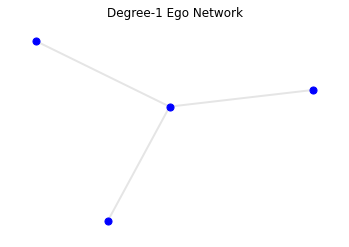

<Figure size 432x288 with 0 Axes>

In [16]:
# Get the depth-1 ego network of purchasedAsin from copurchaseGraph
n = purchasedAsin
ego = networkx.ego_graph(copurchaseGraphMusic, n, radius=1)
purchasedAsinEgoGraph = networkx.Graph(ego)
pos = networkx.layout.spring_layout(purchasedAsinEgoGraph)
M = purchasedAsinEgoGraph.number_of_edges()
nodes = networkx.draw_networkx_nodes(purchasedAsinEgoGraph, pos, node_size=50, node_color='blue')
edges = networkx.draw_networkx_edges(purchasedAsinEgoGraph, pos, node_size=50, edge_cmap=plt.cm.Blues, width=2, alpha=0.1)
ax = plt.gca()
ax.set_axis_off()
plt.title('Degree-1 Ego Network')
plt.figure(0)
plt.show()

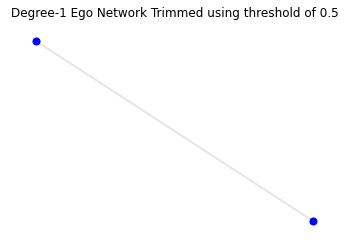

In [17]:
# Use the island method on purchasedAsinEgoGraph to only retain edges with Threshold >= 0.5
threshold = 0.5
purchasedAsinEgoTrimGraph = networkx.Graph()
for f,t,e in purchasedAsinEgoGraph.edges(data=True):
    if e['weight'] >= threshold:
        purchasedAsinEgoTrimGraph.add_edge(f,t, weight=e['weight'])
pos = networkx.layout.spring_layout(purchasedAsinEgoTrimGraph)
M = purchasedAsinEgoTrimGraph.number_of_edges()
nodes = networkx.draw_networkx_nodes(purchasedAsinEgoTrimGraph, pos, node_size=50, node_color='blue', label=True)
edges = networkx.draw_networkx_edges(purchasedAsinEgoTrimGraph, pos, node_size=50, edge_cmap=plt.cm.Blues, width=2, alpha=0.1)
ax = plt.gca()
ax.set_axis_off()
plt.title('Degree-1 Ego Network Trimmed using threshold of 0.5')
plt.figure(1)
plt.show()

In [18]:
# Get the list of nodes connected to the purchasedAsin
purchasedAsinNeighbours = purchasedAsinEgoTrimGraph.neighbors(purchasedAsin)

In [19]:
# Get Top Five book recommendations from among the purchasedAsinNeighbours based on one or more of the following data of the 
# neighbouring nodes: SalesRank, AvgRating, TotalReviews, DegreeCentrality, and ClusteringCoeff

# Accessing metadata with ASIN in purchasedAsinNeighbours
AsMeta = []
for asin in purchasedAsinNeighbours:
    ASIN = asin
    Title = amazonMusic[asin]['Title']
    SalesRank = amazonMusic[asin]['SalesRank']
    TotalReviews = amazonMusic[asin]['TotalReviews']
    AvgRating = amazonMusic[asin]['AvgRating']
    DegreeCentrality = amazonMusic[asin]['DegreeCentrality']
    ClusteringCoeff = amazonMusic[asin]['ClusteringCoeff']
    AsMeta.append((ASIN, Title, SalesRank, TotalReviews, AvgRating, DegreeCentrality, ClusteringCoeff))
    
# Sorting the top five nodes in purchasedAsinNeighbour by Average Rating then by TotalReviews
T5_byAvgRating_then_byTotalReviews = sorted(AsMeta, key=lambda x: (x[4], x[3]), reverse=True)[:5]


In [20]:
print('\nTop  Recommendation by AvgRating then by TotalReviews for Users listening the music:')
print('\n------------------------------------------------------------------------------------')
print('ASIN\t', 'Title\t', 'SalesRank\t', 'TotalReviews\t', 'AvgRating\t', 'DegreeCentrality\t', 'ClusteringCoeff')
for asin in T5_byAvgRating_then_byTotalReviews:
    print(asin)


Top  Recommendation by AvgRating then by TotalReviews for Users listening the music:

------------------------------------------------------------------------------------
ASIN	 Title	 SalesRank	 TotalReviews	 AvgRating	 DegreeCentrality	 ClusteringCoeff
('B00000JQIE', 'The Modern World', 29836, 5, 5.0, 2, 0.0)
